In [2]:
import pandas as pd
import os
import pickle

In [3]:
from google.colab import drive
drive.mount("/content/drive")

os.chdir('/content/drive/MyDrive/SI 630 project')
# os.listdir('.')

Mounted at /content/drive


In [4]:
os.listdir('datasets/CADEC/CADEC.v2/cadec')


['sct',
 'text',
 'original - unedited version of edited files',
 'meddra - unedited version of edited files',
 'sct - unedited version of edited files',
 'original',
 'meddra']

In [5]:
suf = '_v2'

data_save_dir = 'data'+suf

suf += '_finetune_glove'

In [6]:
meddra_counts = pd.read_csv(data_save_dir+'/meddra_counts.csv')
meddra_counts

,ner,meddra,counts_exploded,counts,counts_exploded_rank
0,Drug,Lipitor,1081,1073,1
1,ADR,CONCEPT_LESS,1016,266,2
2,ADR,Severe_pain,722,247,3
3,ADR,Myalgia,619,305,4
4,ADR,Pain,292,260,5
...,...,...,...,...,...
1294,Finding,Senility,1,1,1233
1295,Drug,Seroquel,1,1,1233
1296,Drug,Solaraze,1,1,1233
1297,Drug,Tagamet,1,1,1233


In [7]:
meddra_counts.loc[meddra_counts.ner == 'ADR',:]

,ner,meddra,counts_exploded,counts,counts_exploded_rank
1,ADR,CONCEPT_LESS,1016,266,2
2,ADR,Severe_pain,722,247,3
3,ADR,Myalgia,619,305,4
4,ADR,Pain,292,260,5
5,ADR,Arthralgia,280,163,6
...,...,...,...,...,...
1268,ADR,Labyrinthitis,1,1,1233
1269,ADR,Dysphagia,1,1,1233
1275,ADR,Lupus_erythematosus,1,1,1233
1278,ADR,Cataract,1,1,1233


In [8]:
with open(data_save_dir+'/cadec_flair_objects.pkl', 'rb') as f:
    docs = pickle.load(f)
docs[:10]

[Sentence[117]: "i feel a bit drowsy & have a little blurred vision , so far no gastric problems . ive been on arthrotec 50 for over 10 years on and off , only taking it when i needed it . due to my arthritis getting progressively worse , to the point where i am in tears with the agony , gp ' s started me on 75 twice a day and i have to take it . every day for the next month to see how i get on , here goes . so far its been very good , pains almost gone , but i feel a bit weird , didnt have that when on 50 ." → ["i"/O/O, "feel"/O/O, "a"/O/O, "bit"/B-ADR/B-Drowsy, "drowsy"/E-ADR/E-Drowsy, "&"/O/O, "have"/O/O, "a"/O/O, "little"/B-ADR/B-Blurred_vision_-_hazy, "blurred"/I-ADR/I-Blurred_vision_-_hazy, "vision"/E-ADR/E-Blurred_vision_-_hazy, ","/O/O, "so"/O/O, "far"/O/O, "no"/O/O, "gastric"/B-ADR/B-Excessive_upper_gastrointestinal_gas, "problems"/E-ADR/E-Excessive_upper_gastrointestinal_gas, "."/O/O, "ive"/O/O, "been"/O/O, "on"/O/O, "arthrotec"/S-Drug/S-Arthrotec, "50"/O/O, "for"/O/O, "over"

In [9]:
len(docs)

1186

In [10]:
temp = docs[0]
temp

Sentence[117]: "i feel a bit drowsy & have a little blurred vision , so far no gastric problems . ive been on arthrotec 50 for over 10 years on and off , only taking it when i needed it . due to my arthritis getting progressively worse , to the point where i am in tears with the agony , gp ' s started me on 75 twice a day and i have to take it . every day for the next month to see how i get on , here goes . so far its been very good , pains almost gone , but i feel a bit weird , didnt have that when on 50 ." → ["i"/O/O, "feel"/O/O, "a"/O/O, "bit"/B-ADR/B-Drowsy, "drowsy"/E-ADR/E-Drowsy, "&"/O/O, "have"/O/O, "a"/O/O, "little"/B-ADR/B-Blurred_vision_-_hazy, "blurred"/I-ADR/I-Blurred_vision_-_hazy, "vision"/E-ADR/E-Blurred_vision_-_hazy, ","/O/O, "so"/O/O, "far"/O/O, "no"/O/O, "gastric"/B-ADR/B-Excessive_upper_gastrointestinal_gas, "problems"/E-ADR/E-Excessive_upper_gastrointestinal_gas, "."/O/O, "ive"/O/O, "been"/O/O, "on"/O/O, "arthrotec"/S-Drug/S-Arthrotec, "50"/O/O, "for"/O/O, "over"/

In [11]:
temp.annotation_layers

{'ner': ['Token[0]: "i"'/'O' (1.0),
  'Token[1]: "feel"'/'O' (1.0),
  'Token[2]: "a"'/'O' (1.0),
  'Token[3]: "bit"'/'B-ADR' (1.0),
  'Token[4]: "drowsy"'/'E-ADR' (1.0),
  'Token[5]: "&"'/'O' (1.0),
  'Token[6]: "have"'/'O' (1.0),
  'Token[7]: "a"'/'O' (1.0),
  'Token[8]: "little"'/'B-ADR' (1.0),
  'Token[9]: "blurred"'/'I-ADR' (1.0),
  'Token[10]: "vision"'/'E-ADR' (1.0),
  'Token[11]: ","'/'O' (1.0),
  'Token[12]: "so"'/'O' (1.0),
  'Token[13]: "far"'/'O' (1.0),
  'Token[14]: "no"'/'O' (1.0),
  'Token[15]: "gastric"'/'B-ADR' (1.0),
  'Token[16]: "problems"'/'E-ADR' (1.0),
  'Token[17]: "."'/'O' (1.0),
  'Token[18]: "ive"'/'O' (1.0),
  'Token[19]: "been"'/'O' (1.0),
  'Token[20]: "on"'/'O' (1.0),
  'Token[21]: "arthrotec"'/'S-Drug' (1.0),
  'Token[22]: "50"'/'O' (1.0),
  'Token[23]: "for"'/'O' (1.0),
  'Token[24]: "over"'/'O' (1.0),
  'Token[25]: "10"'/'O' (1.0),
  'Token[26]: "years"'/'O' (1.0),
  'Token[27]: "on"'/'O' (1.0),
  'Token[28]: "and"'/'O' (1.0),
  'Token[29]: "off"'/'O' (

In [12]:

# define your NER tags
label_dict = {
    'ADR': 'ADR',
    'Drug': 'Drug',
    'Finding': 'Finding',
    'Symptom': 'Symptom',
    'Disease': 'Disease'
}

In [13]:
from flair.data import Corpus

from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings, TransformerWordEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer
from sklearn.model_selection import train_test_split

from torch.optim import AdamW, SGD

from flair.visual.training_curves import Plotter
plotter = Plotter()



train_docs, test_docs = train_test_split(docs, test_size=0.2, random_state=321)
dev_docs, test_docs = train_test_split(test_docs, test_size=0.5, random_state=123)

corpus = Corpus(train=train_docs, dev=dev_docs, test=test_docs) # Corpus: 948 train + 119 dev + 119 test sentences
corpus.filter_empty_sentences()
# # create a tag dictionary
labels = ['ADR', 'Drug', 'Finding', 'Symptom', 'Disease']
# tag_dictionary = Dictionary(add_unk=True)
# for label in labels:
#     tag_dictionary.add_item(label)
tag_dictionary = corpus.make_label_dictionary(label_type='ner')
print(tag_dictionary.span_labels)

# create a stacked embedding using GloVe and Flair embeddings
stacked_embeddings = StackedEmbeddings([
    WordEmbeddings('glove',
                   force_cpu=False,
                #    embedding_length=1024,
                   fine_tune=True,
                   ),
    # TransformerWordEmbeddings('emilyalsentzer/Bio_ClinicalBERT', layers="-1",
    #                                    subtoken_pooling="first",
    #                                    is_document_embedding=True,
    #                                    fine_tune=True,
    #                                    use_context=True,
    #                                    max_seq_length=1024,
    #                                    ),
    FlairEmbeddings('news-forward',
                    # fine_tune=True
                    ),
    FlairEmbeddings('news-backward',
                    # fine_tune=True
                    ),
])
# https://github.com/flairNLP/flair/blob/master/resources/docs/embeddings/FLAIR_EMBEDDINGS.md

# create a SequenceTagger object and specify the tag dictionary and embeddings to use
tagger = SequenceTagger(hidden_size=256,
                        embeddings=stacked_embeddings,
                        tag_dictionary=tag_dictionary,
                        tag_type='ner',
                        # use_crf=False,
                        # use_rnn=False,
                        # reproject_embeddings=False,
                        )
tagger.predict_spans = False

print(tagger._determine_if_span_prediction_problem(tagger.label_dictionary))
print(tagger.predict_spans)

# https://github.com/flairNLP/flair/blob/master/flair/trainers/trainer.py
# create a ModelTrainer object and train the tagger
trainer = ModelTrainer(tagger, corpus)

2023-04-21 05:14:09,403 Filtering empty sentences
2023-04-21 05:14:09,463 Corpus: 948 train + 119 dev + 119 test sentences
2023-04-21 05:14:09,465 Computing label dictionary. Progress:


948it [00:00, 6479.05it/s]

2023-04-21 05:14:09,616 Dictionary created for label 'ner' with 22 values: O (seen 79057 times), I-ADR (seen 4449 times), E-ADR (seen 3506 times), B-ADR (seen 3349 times), S-ADR (seen 1363 times), S-Drug (seen 1286 times), B-Finding (seen 200 times), E-Finding (seen 200 times), I-Finding (seen 149 times), B-Disease (seen 119 times), E-Disease (seen 119 times), E-Symptom (seen 114 times), S-Disease (seen 112 times), S-Symptom (seen 112 times), E-Drug (seen 111 times), B-Symptom (seen 110 times), B-Drug (seen 110 times), S-Finding (seen 109 times), I-Symptom (seen 104 times), I-Drug (seen 50 times)
False


2023-04-21 05:14:10,111 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmpwmlz5m2c


100%|██████████| 153M/153M [00:06<00:00, 22.9MB/s]

2023-04-21 05:14:17,459 copying /tmp/tmpwmlz5m2c to cache at /root/.flair/embeddings/glove.gensim.vectors.npy
2023-04-21 05:14:17,577 removing temp file /tmp/tmpwmlz5m2c


2023-04-21 05:14:17,957 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to /tmp/tmpnh1czcrq


100%|██████████| 20.5M/20.5M [00:01<00:00, 14.1MB/s]

2023-04-21 05:14:19,839 copying /tmp/tmpnh1czcrq to cache at /root/.flair/embeddings/glove.gensim
2023-04-21 05:14:19,857 removing temp file /tmp/tmpnh1czcrq


2023-04-21 05:14:31,226 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmpcj38ip17


100%|██████████| 69.7M/69.7M [00:03<00:00, 20.1MB/s]

2023-04-21 05:14:35,221 copying /tmp/tmpcj38ip17 to cache at /root/.flair/embeddings/news-forward-0.4.1.pt


2023-04-21 05:14:35,278 removing temp file /tmp/tmpcj38ip17
2023-04-21 05:14:40,639 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmpo417bv3u


100%|██████████| 69.7M/69.7M [00:03<00:00, 20.1MB/s]

2023-04-21 05:14:44,638 copying /tmp/tmpo417bv3u to cache at /root/.flair/embeddings/news-backward-0.4.1.pt


2023-04-21 05:14:44,695 removing temp file /tmp/tmpo417bv3u
2023-04-21 05:14:44,923 SequenceTagger predicts: Dictionary with 22 tags: <unk>, O, I-ADR, E-ADR, B-ADR, S-ADR, S-Drug, B-Finding, E-Finding, I-Finding, B-Disease, E-Disease, E-Symptom, S-Disease, S-Symptom, E-Drug, B-Symptom, B-Drug, S-Finding, I-Symptom, I-Drug, I-Disease
True
False


In [14]:
# !tensorboard --logdir=runs
# http://localhost:6006/

In [15]:
hist = trainer.train('flair_ner_model'+suf,
              embeddings_storage_mode='gpu',
              gold_label_dictionary_for_eval=tag_dictionary,
              mini_batch_size = 12,
              eval_batch_size = 12,
              patience=1,
              anneal_factor = 0.5,
              anneal_against_dev_loss=True,
              main_evaluation_metric = ("weighted avg", "f1-score"),
              metrics_for_tensorboard=[("weighted avg", 'precision'), ("weighted avg", 'recall'), ("macro avg", 'f1-score'), ("macro avg", 'precision'), ("macro avg", 'recall')],
              use_tensorboard=True,
              tensorboard_comment='Flair NER',
              tensorboard_log_dir='runs/tb_logs'+suf,
              min_learning_rate=3e-8,
              optimizer=AdamW,
              learning_rate=1e-1,
              weight_decay=0.001,
              max_epochs=100,
              monitor_train=True,
              save_optimizer_state=True,)
# hist

2023-04-21 05:14:45,191 tensorboard logging path is runs/tb_logs_v2_finetune_glove
2023-04-21 05:14:45,202 ----------------------------------------------------------------------------------------------------
2023-04-21 05:14:45,204 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'glove'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=4196, out_features=4196, bias=True)
  (rnn): LSTM(4196, 256, batch_first=True, bidirectio

100%|██████████| 79/79 [00:22<00:00,  3.50it/s]

2023-04-21 05:15:41,511 Evaluating as a multi-label problem: True


2023-04-21 05:15:45,501 TRAIN : loss 4.2427520751953125 - f1-score (weighted avg)  0.0541


100%|██████████| 10/10 [00:04<00:00,  2.31it/s]

2023-04-21 05:15:49,985 Evaluating as a multi-label problem: False
2023-04-21 05:15:50,061 DEV : loss 4.373092174530029 - f1-score (weighted avg)  0.0525
2023-04-21 05:15:50,085 BAD EPOCHS (no improvement): 0
2023-04-21 05:15:50,090 saving best model


2023-04-21 05:15:52,910 ----------------------------------------------------------------------------------------------------
2023-04-21 05:15:54,778 epoch 2 - iter 7/79 - loss 4.61289987 - time (sec): 1.87 - samples/sec: 4621.60 - lr: 0.100000
2023-04-21 05:15:56,612 epoch 2 - iter 14/79 - loss 3.88620598 - time (sec): 3.70 - samples/sec: 4784.85 - lr: 0.100000
2023-04-21 05:15:58,325 epoch 2 - iter 21/79 - loss 3.58911460 - time (sec): 5.41 - samples/sec: 4892.20 - lr: 0.100000
2023-04-21 05:16:00,318 epoch 2 - iter 28/79 - loss 3.59590795 - time (sec): 7.41 - samples/sec: 4720.36 - lr: 0.100000
2023-04-21 05:16:02,266 epoch 2 - iter 35/79 - loss 3.66934844 - time (sec): 9.35 - samples/sec: 4731.66 - lr: 0.100000
2023-04-21 05:16:03,925 epoch 2 - iter 42/79 - loss 3.65248607 - time (sec): 11.01 - samples/sec: 4687.94 - lr: 0.100000
2023-04-21 05:16:06,366 epoch 2 - iter 49/79 - loss 3.73183670 - time (sec): 13.45 - samples/sec: 4493.50 - lr: 0.100000
2023-04-21 05:16:08,170 epoch 2 - 

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]

2023-04-21 05:16:35,168 Evaluating as a multi-label problem: True


2023-04-21 05:16:37,797 TRAIN : loss 2.178295135498047 - f1-score (weighted avg)  0.1028


100%|██████████| 10/10 [00:03<00:00,  2.62it/s]

2023-04-21 05:16:41,782 Evaluating as a multi-label problem: False
2023-04-21 05:16:41,847 DEV : loss 2.2850496768951416 - f1-score (weighted avg)  0.0929
2023-04-21 05:16:41,871 BAD EPOCHS (no improvement): 0
2023-04-21 05:16:41,877 saving best model


2023-04-21 05:16:44,842 ----------------------------------------------------------------------------------------------------
2023-04-21 05:16:46,826 epoch 3 - iter 7/79 - loss 3.14407126 - time (sec): 1.98 - samples/sec: 4894.04 - lr: 0.100000
2023-04-21 05:16:48,875 epoch 3 - iter 14/79 - loss 3.30294582 - time (sec): 4.03 - samples/sec: 4565.68 - lr: 0.100000
2023-04-21 05:16:50,088 epoch 3 - iter 21/79 - loss 3.42635796 - time (sec): 5.24 - samples/sec: 4707.79 - lr: 0.100000
2023-04-21 05:16:52,202 epoch 3 - iter 28/79 - loss 3.30267570 - time (sec): 7.36 - samples/sec: 4560.56 - lr: 0.100000
2023-04-21 05:16:54,120 epoch 3 - iter 35/79 - loss 3.20580083 - time (sec): 9.27 - samples/sec: 4435.38 - lr: 0.100000
2023-04-21 05:16:55,955 epoch 3 - iter 42/79 - loss 3.20657144 - time (sec): 11.11 - samples/sec: 4348.73 - lr: 0.100000
2023-04-21 05:16:57,794 epoch 3 - iter 49/79 - loss 3.25216445 - time (sec): 12.95 - samples/sec: 4416.51 - lr: 0.100000
2023-04-21 05:16:59,480 epoch 3 - 

100%|██████████| 79/79 [00:21<00:00,  3.76it/s]

2023-04-21 05:17:26,997 Evaluating as a multi-label problem: True


2023-04-21 05:17:29,728 TRAIN : loss 1.7667889595031738 - f1-score (weighted avg)  0.1824


100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

2023-04-21 05:17:32,620 Evaluating as a multi-label problem: False
2023-04-21 05:17:32,689 DEV : loss 1.86513090133667 - f1-score (weighted avg)  0.1858
2023-04-21 05:17:32,712 BAD EPOCHS (no improvement): 0
2023-04-21 05:17:32,717 saving best model


2023-04-21 05:17:35,633 ----------------------------------------------------------------------------------------------------
2023-04-21 05:17:37,910 epoch 4 - iter 7/79 - loss 2.36510231 - time (sec): 2.28 - samples/sec: 3938.31 - lr: 0.100000
2023-04-21 05:17:39,519 epoch 4 - iter 14/79 - loss 2.70695062 - time (sec): 3.88 - samples/sec: 4440.85 - lr: 0.100000
2023-04-21 05:17:42,966 epoch 4 - iter 21/79 - loss 3.08947281 - time (sec): 7.33 - samples/sec: 3464.52 - lr: 0.100000
2023-04-21 05:17:44,967 epoch 4 - iter 28/79 - loss 3.29325083 - time (sec): 9.33 - samples/sec: 3580.81 - lr: 0.100000
2023-04-21 05:17:46,858 epoch 4 - iter 35/79 - loss 3.23087822 - time (sec): 11.22 - samples/sec: 3779.16 - lr: 0.100000
2023-04-21 05:17:48,680 epoch 4 - iter 42/79 - loss 3.20104489 - time (sec): 13.04 - samples/sec: 3888.44 - lr: 0.100000
2023-04-21 05:17:50,374 epoch 4 - iter 49/79 - loss 3.17732008 - time (sec): 14.74 - samples/sec: 3960.58 - lr: 0.100000
2023-04-21 05:17:52,224 epoch 4 -

100%|██████████| 79/79 [00:22<00:00,  3.57it/s]

2023-04-21 05:18:20,655 Evaluating as a multi-label problem: True


2023-04-21 05:18:23,353 TRAIN : loss 2.2562854290008545 - f1-score (weighted avg)  0.0811


100%|██████████| 10/10 [00:02<00:00,  3.69it/s]

2023-04-21 05:18:26,232 Evaluating as a multi-label problem: False
2023-04-21 05:18:26,295 DEV : loss 2.3639578819274902 - f1-score (weighted avg)  0.0975
2023-04-21 05:18:26,317 BAD EPOCHS (no improvement): 1
2023-04-21 05:18:26,322 ----------------------------------------------------------------------------------------------------


2023-04-21 05:18:27,817 epoch 5 - iter 7/79 - loss 2.89226966 - time (sec): 1.49 - samples/sec: 5178.76 - lr: 0.100000
2023-04-21 05:18:29,573 epoch 5 - iter 14/79 - loss 2.91725818 - time (sec): 3.25 - samples/sec: 5055.45 - lr: 0.100000
2023-04-21 05:18:31,190 epoch 5 - iter 21/79 - loss 2.91504602 - time (sec): 4.87 - samples/sec: 4928.61 - lr: 0.100000
2023-04-21 05:18:33,692 epoch 5 - iter 28/79 - loss 2.87541534 - time (sec): 7.37 - samples/sec: 4429.06 - lr: 0.100000
2023-04-21 05:18:35,610 epoch 5 - iter 35/79 - loss 3.04778339 - time (sec): 9.29 - samples/sec: 4594.09 - lr: 0.100000
2023-04-21 05:18:37,602 epoch 5 - iter 42/79 - loss 3.07186297 - time (sec): 11.28 - samples/sec: 4515.84 - lr: 0.100000
2023-04-21 05:18:39,386 epoch 5 - iter 49/79 - loss 3.05300339 - time (sec): 13.06 - samples/sec: 4461.01 - lr: 0.100000
2023-04-21 05:18:41,140 epoch 5 - iter 56/79 - loss 2.97865472 - time (sec): 14.82 - samples/sec: 4478.17 - lr: 0.100000
2023-04-21 05:18:43,037 epoch 5 - iter

100%|██████████| 79/79 [00:22<00:00,  3.56it/s]

2023-04-21 05:19:09,484 Evaluating as a multi-label problem: True


2023-04-21 05:19:12,190 TRAIN : loss 2.359982967376709 - f1-score (weighted avg)  0.0396


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 05:19:15,090 Evaluating as a multi-label problem: False
2023-04-21 05:19:15,154 DEV : loss 2.4284677505493164 - f1-score (weighted avg)  0.0455
2023-04-21 05:19:15,178 Epoch     5: reducing learning rate of group 0 to 5.0000e-02.
2023-04-21 05:19:15,181 BAD EPOCHS (no improvement): 2
2023-04-21 05:19:15,184 ----------------------------------------------------------------------------------------------------


2023-04-21 05:19:16,897 epoch 6 - iter 7/79 - loss 2.27761249 - time (sec): 1.71 - samples/sec: 5048.07 - lr: 0.050000
2023-04-21 05:19:18,404 epoch 6 - iter 14/79 - loss 2.24112461 - time (sec): 3.22 - samples/sec: 4865.88 - lr: 0.050000
2023-04-21 05:19:20,547 epoch 6 - iter 21/79 - loss 2.25439612 - time (sec): 5.36 - samples/sec: 4599.48 - lr: 0.050000
2023-04-21 05:19:22,285 epoch 6 - iter 28/79 - loss 2.34410625 - time (sec): 7.10 - samples/sec: 4536.47 - lr: 0.050000
2023-04-21 05:19:24,006 epoch 6 - iter 35/79 - loss 2.40913814 - time (sec): 8.82 - samples/sec: 4512.21 - lr: 0.050000
2023-04-21 05:19:25,744 epoch 6 - iter 42/79 - loss 2.38308223 - time (sec): 10.56 - samples/sec: 4582.81 - lr: 0.050000
2023-04-21 05:19:27,536 epoch 6 - iter 49/79 - loss 2.37318738 - time (sec): 12.35 - samples/sec: 4608.47 - lr: 0.050000
2023-04-21 05:19:29,306 epoch 6 - iter 56/79 - loss 2.35776717 - time (sec): 14.12 - samples/sec: 4610.69 - lr: 0.050000
2023-04-21 05:19:31,315 epoch 6 - iter

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]


2023-04-21 05:19:58,434 Evaluating as a multi-label problem: True
2023-04-21 05:20:01,111 TRAIN : loss 1.7917134761810303 - f1-score (weighted avg)  0.0838


100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

2023-04-21 05:20:03,988 Evaluating as a multi-label problem: False
2023-04-21 05:20:04,052 DEV : loss 1.8242390155792236 - f1-score (weighted avg)  0.0941
2023-04-21 05:20:04,074 BAD EPOCHS (no improvement): 0
2023-04-21 05:20:04,078 saving best model


2023-04-21 05:20:07,038 ----------------------------------------------------------------------------------------------------
2023-04-21 05:20:09,249 epoch 7 - iter 7/79 - loss 1.92791162 - time (sec): 2.21 - samples/sec: 3648.22 - lr: 0.050000
2023-04-21 05:20:10,974 epoch 7 - iter 14/79 - loss 2.01102777 - time (sec): 3.93 - samples/sec: 4331.34 - lr: 0.050000
2023-04-21 05:20:12,879 epoch 7 - iter 21/79 - loss 1.94251702 - time (sec): 5.84 - samples/sec: 4403.56 - lr: 0.050000
2023-04-21 05:20:15,272 epoch 7 - iter 28/79 - loss 1.89679367 - time (sec): 8.23 - samples/sec: 4225.00 - lr: 0.050000
2023-04-21 05:20:16,968 epoch 7 - iter 35/79 - loss 1.90352870 - time (sec): 9.93 - samples/sec: 4375.35 - lr: 0.050000
2023-04-21 05:20:18,727 epoch 7 - iter 42/79 - loss 1.87494645 - time (sec): 11.69 - samples/sec: 4350.95 - lr: 0.050000
2023-04-21 05:20:20,630 epoch 7 - iter 49/79 - loss 1.89170154 - time (sec): 13.59 - samples/sec: 4333.83 - lr: 0.050000
2023-04-21 05:20:22,211 epoch 7 - 

100%|██████████| 79/79 [00:21<00:00,  3.76it/s]

2023-04-21 05:20:49,882 Evaluating as a multi-label problem: True


2023-04-21 05:20:53,797 TRAIN : loss 1.2103368043899536 - f1-score (weighted avg)  0.0961


100%|██████████| 10/10 [00:02<00:00,  3.60it/s]

2023-04-21 05:20:56,735 Evaluating as a multi-label problem: False
2023-04-21 05:20:56,801 DEV : loss 1.285314679145813 - f1-score (weighted avg)  0.0985
2023-04-21 05:20:56,823 BAD EPOCHS (no improvement): 0
2023-04-21 05:20:56,828 saving best model


2023-04-21 05:20:59,799 ----------------------------------------------------------------------------------------------------
2023-04-21 05:21:01,597 epoch 8 - iter 7/79 - loss 1.55411811 - time (sec): 1.80 - samples/sec: 4627.95 - lr: 0.050000
2023-04-21 05:21:04,028 epoch 8 - iter 14/79 - loss 1.55890125 - time (sec): 4.23 - samples/sec: 4244.19 - lr: 0.050000
2023-04-21 05:21:05,580 epoch 8 - iter 21/79 - loss 1.71361247 - time (sec): 5.78 - samples/sec: 4500.22 - lr: 0.050000
2023-04-21 05:21:07,325 epoch 8 - iter 28/79 - loss 1.67733632 - time (sec): 7.52 - samples/sec: 4526.01 - lr: 0.050000
2023-04-21 05:21:09,307 epoch 8 - iter 35/79 - loss 1.69191179 - time (sec): 9.51 - samples/sec: 4441.43 - lr: 0.050000
2023-04-21 05:21:10,905 epoch 8 - iter 42/79 - loss 1.68595417 - time (sec): 11.10 - samples/sec: 4482.22 - lr: 0.050000
2023-04-21 05:21:13,045 epoch 8 - iter 49/79 - loss 1.67752874 - time (sec): 13.24 - samples/sec: 4463.14 - lr: 0.050000
2023-04-21 05:21:15,131 epoch 8 - 

100%|██████████| 79/79 [00:20<00:00,  3.77it/s]

2023-04-21 05:21:42,095 Evaluating as a multi-label problem: True


2023-04-21 05:21:44,748 TRAIN : loss 1.2605350017547607 - f1-score (weighted avg)  0.0982


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

2023-04-21 05:21:47,660 Evaluating as a multi-label problem: False
2023-04-21 05:21:47,722 DEV : loss 1.2701125144958496 - f1-score (weighted avg)  0.1067
2023-04-21 05:21:47,746 BAD EPOCHS (no improvement): 0
2023-04-21 05:21:47,750 saving best model


2023-04-21 05:21:50,698 ----------------------------------------------------------------------------------------------------
2023-04-21 05:21:53,093 epoch 9 - iter 7/79 - loss 1.57894057 - time (sec): 2.39 - samples/sec: 3740.91 - lr: 0.050000
2023-04-21 05:21:55,016 epoch 9 - iter 14/79 - loss 1.54112881 - time (sec): 4.31 - samples/sec: 4059.10 - lr: 0.050000
2023-04-21 05:21:56,708 epoch 9 - iter 21/79 - loss 1.59198497 - time (sec): 6.01 - samples/sec: 4206.07 - lr: 0.050000
2023-04-21 05:21:58,603 epoch 9 - iter 28/79 - loss 1.55814280 - time (sec): 7.90 - samples/sec: 4237.54 - lr: 0.050000
2023-04-21 05:22:00,385 epoch 9 - iter 35/79 - loss 1.56233986 - time (sec): 9.68 - samples/sec: 4391.53 - lr: 0.050000
2023-04-21 05:22:02,188 epoch 9 - iter 42/79 - loss 1.53961945 - time (sec): 11.49 - samples/sec: 4368.56 - lr: 0.050000
2023-04-21 05:22:04,426 epoch 9 - iter 49/79 - loss 1.51745524 - time (sec): 13.72 - samples/sec: 4222.24 - lr: 0.050000
2023-04-21 05:22:06,332 epoch 9 - 

100%|██████████| 79/79 [00:22<00:00,  3.54it/s]

2023-04-21 05:22:34,882 Evaluating as a multi-label problem: True


2023-04-21 05:22:37,619 TRAIN : loss 0.9575742483139038 - f1-score (weighted avg)  0.1207


100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

2023-04-21 05:22:40,548 Evaluating as a multi-label problem: False
2023-04-21 05:22:40,619 DEV : loss 1.0147453546524048 - f1-score (weighted avg)  0.1142
2023-04-21 05:22:40,644 BAD EPOCHS (no improvement): 0
2023-04-21 05:22:40,650 saving best model


2023-04-21 05:22:43,579 ----------------------------------------------------------------------------------------------------
2023-04-21 05:22:45,478 epoch 10 - iter 7/79 - loss 1.40599760 - time (sec): 1.90 - samples/sec: 4349.91 - lr: 0.050000
2023-04-21 05:22:46,997 epoch 10 - iter 14/79 - loss 1.41567938 - time (sec): 3.42 - samples/sec: 4916.96 - lr: 0.050000
2023-04-21 05:22:48,903 epoch 10 - iter 21/79 - loss 1.37022098 - time (sec): 5.32 - samples/sec: 4738.15 - lr: 0.050000
2023-04-21 05:22:50,746 epoch 10 - iter 28/79 - loss 1.34248332 - time (sec): 7.16 - samples/sec: 4750.63 - lr: 0.050000
2023-04-21 05:22:52,449 epoch 10 - iter 35/79 - loss 1.32598924 - time (sec): 8.87 - samples/sec: 4738.65 - lr: 0.050000
2023-04-21 05:22:55,018 epoch 10 - iter 42/79 - loss 1.30758311 - time (sec): 11.44 - samples/sec: 4508.34 - lr: 0.050000
2023-04-21 05:22:56,852 epoch 10 - iter 49/79 - loss 1.34296218 - time (sec): 13.27 - samples/sec: 4484.20 - lr: 0.050000
2023-04-21 05:22:58,845 epo

100%|██████████| 79/79 [00:22<00:00,  3.54it/s]

2023-04-21 05:23:27,258 Evaluating as a multi-label problem: True


2023-04-21 05:23:29,975 TRAIN : loss 1.0223559141159058 - f1-score (weighted avg)  0.0697


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 05:23:32,884 Evaluating as a multi-label problem: False
2023-04-21 05:23:32,947 DEV : loss 1.0286744832992554 - f1-score (weighted avg)  0.0666
2023-04-21 05:23:32,969 BAD EPOCHS (no improvement): 1
2023-04-21 05:23:32,974 ----------------------------------------------------------------------------------------------------


2023-04-21 05:23:35,279 epoch 11 - iter 7/79 - loss 1.34568557 - time (sec): 2.30 - samples/sec: 3815.95 - lr: 0.050000
2023-04-21 05:23:36,942 epoch 11 - iter 14/79 - loss 1.33211681 - time (sec): 3.97 - samples/sec: 4166.56 - lr: 0.050000
2023-04-21 05:23:38,846 epoch 11 - iter 21/79 - loss 1.40331405 - time (sec): 5.87 - samples/sec: 4251.42 - lr: 0.050000
2023-04-21 05:23:40,436 epoch 11 - iter 28/79 - loss 1.39494568 - time (sec): 7.46 - samples/sec: 4376.99 - lr: 0.050000
2023-04-21 05:23:42,261 epoch 11 - iter 35/79 - loss 1.38686518 - time (sec): 9.29 - samples/sec: 4447.15 - lr: 0.050000
2023-04-21 05:23:44,060 epoch 11 - iter 42/79 - loss 1.39389409 - time (sec): 11.08 - samples/sec: 4518.25 - lr: 0.050000
2023-04-21 05:23:46,058 epoch 11 - iter 49/79 - loss 1.38177656 - time (sec): 13.08 - samples/sec: 4489.39 - lr: 0.050000
2023-04-21 05:23:47,781 epoch 11 - iter 56/79 - loss 1.38130886 - time (sec): 14.81 - samples/sec: 4548.21 - lr: 0.050000
2023-04-21 05:23:49,288 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.76it/s]


2023-04-21 05:24:16,170 Evaluating as a multi-label problem: True
2023-04-21 05:24:18,880 TRAIN : loss 0.9271855354309082 - f1-score (weighted avg)  0.1115


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 05:24:21,771 Evaluating as a multi-label problem: False
2023-04-21 05:24:21,838 DEV : loss 0.9709736108779907 - f1-score (weighted avg)  0.1305
2023-04-21 05:24:21,861 BAD EPOCHS (no improvement): 0
2023-04-21 05:24:21,865 saving best model


2023-04-21 05:24:24,836 ----------------------------------------------------------------------------------------------------
2023-04-21 05:24:26,921 epoch 12 - iter 7/79 - loss 1.23567070 - time (sec): 2.08 - samples/sec: 4307.42 - lr: 0.050000
2023-04-21 05:24:28,398 epoch 12 - iter 14/79 - loss 1.28512492 - time (sec): 3.56 - samples/sec: 4676.33 - lr: 0.050000
2023-04-21 05:24:29,788 epoch 12 - iter 21/79 - loss 1.29196465 - time (sec): 4.95 - samples/sec: 4800.54 - lr: 0.050000
2023-04-21 05:24:32,100 epoch 12 - iter 28/79 - loss 1.28402213 - time (sec): 7.26 - samples/sec: 4512.85 - lr: 0.050000
2023-04-21 05:24:34,192 epoch 12 - iter 35/79 - loss 1.31047095 - time (sec): 9.35 - samples/sec: 4485.62 - lr: 0.050000
2023-04-21 05:24:36,362 epoch 12 - iter 42/79 - loss 1.33879399 - time (sec): 11.52 - samples/sec: 4393.78 - lr: 0.050000
2023-04-21 05:24:38,056 epoch 12 - iter 49/79 - loss 1.33210126 - time (sec): 13.22 - samples/sec: 4369.25 - lr: 0.050000
2023-04-21 05:24:40,371 epo

100%|██████████| 79/79 [00:22<00:00,  3.49it/s]

2023-04-21 05:25:08,996 Evaluating as a multi-label problem: True


2023-04-21 05:25:11,752 TRAIN : loss 1.131022572517395 - f1-score (weighted avg)  0.0948


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

2023-04-21 05:25:14,660 Evaluating as a multi-label problem: False
2023-04-21 05:25:14,735 DEV : loss 1.178237795829773 - f1-score (weighted avg)  0.1009
2023-04-21 05:25:14,758 BAD EPOCHS (no improvement): 1
2023-04-21 05:25:14,762 ----------------------------------------------------------------------------------------------------


2023-04-21 05:25:16,460 epoch 13 - iter 7/79 - loss 1.49304878 - time (sec): 1.70 - samples/sec: 4793.09 - lr: 0.050000
2023-04-21 05:25:18,862 epoch 13 - iter 14/79 - loss 1.48751129 - time (sec): 4.10 - samples/sec: 4219.91 - lr: 0.050000
2023-04-21 05:25:20,977 epoch 13 - iter 21/79 - loss 1.42658584 - time (sec): 6.21 - samples/sec: 4267.00 - lr: 0.050000
2023-04-21 05:25:22,762 epoch 13 - iter 28/79 - loss 1.40317621 - time (sec): 8.00 - samples/sec: 4537.27 - lr: 0.050000
2023-04-21 05:25:24,625 epoch 13 - iter 35/79 - loss 1.43668249 - time (sec): 9.86 - samples/sec: 4518.82 - lr: 0.050000
2023-04-21 05:25:26,184 epoch 13 - iter 42/79 - loss 1.41951950 - time (sec): 11.42 - samples/sec: 4570.58 - lr: 0.050000
2023-04-21 05:25:27,758 epoch 13 - iter 49/79 - loss 1.47238324 - time (sec): 12.99 - samples/sec: 4617.03 - lr: 0.050000
2023-04-21 05:25:29,600 epoch 13 - iter 56/79 - loss 1.53143078 - time (sec): 14.84 - samples/sec: 4610.20 - lr: 0.050000
2023-04-21 05:25:31,413 epoch 

100%|██████████| 79/79 [00:20<00:00,  3.77it/s]

2023-04-21 05:25:57,015 Evaluating as a multi-label problem: True


2023-04-21 05:26:00,920 TRAIN : loss 1.2610647678375244 - f1-score (weighted avg)  0.0166


100%|██████████| 10/10 [00:02<00:00,  3.60it/s]

2023-04-21 05:26:03,858 Evaluating as a multi-label problem: False
2023-04-21 05:26:03,921 DEV : loss 1.2860993146896362 - f1-score (weighted avg)  0.018
2023-04-21 05:26:03,943 Epoch    13: reducing learning rate of group 0 to 2.5000e-02.
2023-04-21 05:26:03,945 BAD EPOCHS (no improvement): 2
2023-04-21 05:26:03,949 ----------------------------------------------------------------------------------------------------


2023-04-21 05:26:05,731 epoch 14 - iter 7/79 - loss 1.25571385 - time (sec): 1.78 - samples/sec: 5223.60 - lr: 0.025000
2023-04-21 05:26:07,324 epoch 14 - iter 14/79 - loss 1.22267476 - time (sec): 3.37 - samples/sec: 5005.14 - lr: 0.025000
2023-04-21 05:26:08,984 epoch 14 - iter 21/79 - loss 1.21769586 - time (sec): 5.03 - samples/sec: 4857.31 - lr: 0.025000
2023-04-21 05:26:10,624 epoch 14 - iter 28/79 - loss 1.16349731 - time (sec): 6.67 - samples/sec: 4801.41 - lr: 0.025000
2023-04-21 05:26:12,664 epoch 14 - iter 35/79 - loss 1.15872504 - time (sec): 8.71 - samples/sec: 4689.66 - lr: 0.025000
2023-04-21 05:26:15,012 epoch 14 - iter 42/79 - loss 1.12592269 - time (sec): 11.06 - samples/sec: 4549.75 - lr: 0.025000
2023-04-21 05:26:16,500 epoch 14 - iter 49/79 - loss 1.10119160 - time (sec): 12.55 - samples/sec: 4605.36 - lr: 0.025000
2023-04-21 05:26:18,400 epoch 14 - iter 56/79 - loss 1.08148536 - time (sec): 14.45 - samples/sec: 4569.28 - lr: 0.025000
2023-04-21 05:26:20,166 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 05:26:46,171 Evaluating as a multi-label problem: True


2023-04-21 05:26:48,859 TRAIN : loss 0.7551295757293701 - f1-score (weighted avg)  0.0442


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

2023-04-21 05:26:51,788 Evaluating as a multi-label problem: False
2023-04-21 05:26:51,852 DEV : loss 0.7829984426498413 - f1-score (weighted avg)  0.0533
2023-04-21 05:26:51,877 BAD EPOCHS (no improvement): 0
2023-04-21 05:26:51,882 saving best model


2023-04-21 05:26:54,834 ----------------------------------------------------------------------------------------------------
2023-04-21 05:26:56,701 epoch 15 - iter 7/79 - loss 0.91905375 - time (sec): 1.87 - samples/sec: 4727.17 - lr: 0.025000
2023-04-21 05:26:58,533 epoch 15 - iter 14/79 - loss 0.96163579 - time (sec): 3.70 - samples/sec: 4673.88 - lr: 0.025000
2023-04-21 05:27:00,185 epoch 15 - iter 21/79 - loss 0.96424391 - time (sec): 5.35 - samples/sec: 4894.38 - lr: 0.025000
2023-04-21 05:27:01,998 epoch 15 - iter 28/79 - loss 0.90967529 - time (sec): 7.16 - samples/sec: 4804.63 - lr: 0.025000
2023-04-21 05:27:04,287 epoch 15 - iter 35/79 - loss 0.88605533 - time (sec): 9.45 - samples/sec: 4540.09 - lr: 0.025000
2023-04-21 05:27:06,400 epoch 15 - iter 42/79 - loss 0.86842082 - time (sec): 11.56 - samples/sec: 4449.87 - lr: 0.025000
2023-04-21 05:27:08,589 epoch 15 - iter 49/79 - loss 0.87638381 - time (sec): 13.75 - samples/sec: 4351.55 - lr: 0.025000
2023-04-21 05:27:10,351 epo

100%|██████████| 79/79 [00:22<00:00,  3.58it/s]

2023-04-21 05:27:38,301 Evaluating as a multi-label problem: True


2023-04-21 05:27:41,009 TRAIN : loss 0.8497432470321655 - f1-score (weighted avg)  0.0646


100%|██████████| 10/10 [00:02<00:00,  3.60it/s]

2023-04-21 05:27:43,949 Evaluating as a multi-label problem: False
2023-04-21 05:27:44,014 DEV : loss 0.8785255551338196 - f1-score (weighted avg)  0.0773
2023-04-21 05:27:44,038 BAD EPOCHS (no improvement): 1
2023-04-21 05:27:44,043 ----------------------------------------------------------------------------------------------------


2023-04-21 05:27:45,736 epoch 16 - iter 7/79 - loss 1.09406536 - time (sec): 1.69 - samples/sec: 4603.13 - lr: 0.025000
2023-04-21 05:27:48,498 epoch 16 - iter 14/79 - loss 0.94561126 - time (sec): 4.45 - samples/sec: 4026.74 - lr: 0.025000
2023-04-21 05:27:50,211 epoch 16 - iter 21/79 - loss 0.91638232 - time (sec): 6.17 - samples/sec: 4240.23 - lr: 0.025000
2023-04-21 05:27:52,219 epoch 16 - iter 28/79 - loss 0.87792624 - time (sec): 8.17 - samples/sec: 4361.86 - lr: 0.025000
2023-04-21 05:27:53,950 epoch 16 - iter 35/79 - loss 0.86490455 - time (sec): 9.90 - samples/sec: 4446.87 - lr: 0.025000
2023-04-21 05:27:55,603 epoch 16 - iter 42/79 - loss 0.85650087 - time (sec): 11.56 - samples/sec: 4484.82 - lr: 0.025000
2023-04-21 05:27:57,245 epoch 16 - iter 49/79 - loss 0.84626779 - time (sec): 13.20 - samples/sec: 4495.90 - lr: 0.025000
2023-04-21 05:27:59,235 epoch 16 - iter 56/79 - loss 0.82270012 - time (sec): 15.19 - samples/sec: 4432.82 - lr: 0.025000
2023-04-21 05:28:00,800 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.53it/s]

2023-04-21 05:28:27,505 Evaluating as a multi-label problem: True


2023-04-21 05:28:30,242 TRAIN : loss 0.6471034288406372 - f1-score (weighted avg)  0.1476


100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

2023-04-21 05:28:33,147 Evaluating as a multi-label problem: False
2023-04-21 05:28:33,222 DEV : loss 0.6910308003425598 - f1-score (weighted avg)  0.1467
2023-04-21 05:28:33,245 BAD EPOCHS (no improvement): 0
2023-04-21 05:28:33,249 saving best model


2023-04-21 05:28:36,220 ----------------------------------------------------------------------------------------------------
2023-04-21 05:28:37,901 epoch 17 - iter 7/79 - loss 0.75747766 - time (sec): 1.68 - samples/sec: 4768.19 - lr: 0.025000
2023-04-21 05:28:39,612 epoch 17 - iter 14/79 - loss 0.91913472 - time (sec): 3.39 - samples/sec: 5017.73 - lr: 0.025000
2023-04-21 05:28:41,238 epoch 17 - iter 21/79 - loss 0.94677905 - time (sec): 5.02 - samples/sec: 5086.34 - lr: 0.025000
2023-04-21 05:28:43,214 epoch 17 - iter 28/79 - loss 0.89294191 - time (sec): 6.99 - samples/sec: 4975.80 - lr: 0.025000
2023-04-21 05:28:44,927 epoch 17 - iter 35/79 - loss 0.90562094 - time (sec): 8.70 - samples/sec: 4782.86 - lr: 0.025000
2023-04-21 05:28:46,906 epoch 17 - iter 42/79 - loss 0.89035717 - time (sec): 10.68 - samples/sec: 4609.91 - lr: 0.025000
2023-04-21 05:28:49,026 epoch 17 - iter 49/79 - loss 0.87345177 - time (sec): 12.80 - samples/sec: 4518.60 - lr: 0.025000
2023-04-21 05:28:51,020 epo

100%|██████████| 79/79 [00:20<00:00,  3.77it/s]


2023-04-21 05:29:20,150 Evaluating as a multi-label problem: True
2023-04-21 05:29:22,856 TRAIN : loss 0.5889941453933716 - f1-score (weighted avg)  0.0678


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

2023-04-21 05:29:25,772 Evaluating as a multi-label problem: False
2023-04-21 05:29:25,837 DEV : loss 0.6286417841911316 - f1-score (weighted avg)  0.0645
2023-04-21 05:29:25,860 BAD EPOCHS (no improvement): 0
2023-04-21 05:29:25,865 saving best model


2023-04-21 05:29:28,793 ----------------------------------------------------------------------------------------------------
2023-04-21 05:29:30,549 epoch 18 - iter 7/79 - loss 0.73191347 - time (sec): 1.74 - samples/sec: 4502.26 - lr: 0.025000
2023-04-21 05:29:32,811 epoch 18 - iter 14/79 - loss 0.74966366 - time (sec): 4.00 - samples/sec: 4284.55 - lr: 0.025000
2023-04-21 05:29:34,727 epoch 18 - iter 21/79 - loss 0.74363157 - time (sec): 5.92 - samples/sec: 4392.17 - lr: 0.025000
2023-04-21 05:29:36,771 epoch 18 - iter 28/79 - loss 0.74743375 - time (sec): 7.96 - samples/sec: 4306.01 - lr: 0.025000
2023-04-21 05:29:38,776 epoch 18 - iter 35/79 - loss 0.77097209 - time (sec): 9.97 - samples/sec: 4256.85 - lr: 0.025000
2023-04-21 05:29:40,501 epoch 18 - iter 42/79 - loss 0.76336059 - time (sec): 11.69 - samples/sec: 4346.43 - lr: 0.025000
2023-04-21 05:29:42,357 epoch 18 - iter 49/79 - loss 0.74903354 - time (sec): 13.55 - samples/sec: 4444.70 - lr: 0.025000
2023-04-21 05:29:44,125 epo

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 05:30:11,505 Evaluating as a multi-label problem: True


2023-04-21 05:30:15,487 TRAIN : loss 0.5852004289627075 - f1-score (weighted avg)  0.0468


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

2023-04-21 05:30:18,393 Evaluating as a multi-label problem: False
2023-04-21 05:30:18,457 DEV : loss 0.6246217489242554 - f1-score (weighted avg)  0.0371
2023-04-21 05:30:18,481 BAD EPOCHS (no improvement): 0
2023-04-21 05:30:18,486 saving best model


2023-04-21 05:30:21,407 ----------------------------------------------------------------------------------------------------
2023-04-21 05:30:23,414 epoch 19 - iter 7/79 - loss 0.68528236 - time (sec): 2.01 - samples/sec: 4661.41 - lr: 0.025000
2023-04-21 05:30:25,179 epoch 19 - iter 14/79 - loss 0.69933332 - time (sec): 3.77 - samples/sec: 4653.18 - lr: 0.025000
2023-04-21 05:30:27,107 epoch 19 - iter 21/79 - loss 0.73536976 - time (sec): 5.70 - samples/sec: 4597.25 - lr: 0.025000
2023-04-21 05:30:29,139 epoch 19 - iter 28/79 - loss 0.78984643 - time (sec): 7.73 - samples/sec: 4461.71 - lr: 0.025000
2023-04-21 05:30:31,234 epoch 19 - iter 35/79 - loss 0.77481967 - time (sec): 9.82 - samples/sec: 4336.57 - lr: 0.025000
2023-04-21 05:30:33,400 epoch 19 - iter 42/79 - loss 0.76030973 - time (sec): 11.99 - samples/sec: 4172.43 - lr: 0.025000
2023-04-21 05:30:35,227 epoch 19 - iter 49/79 - loss 0.75279586 - time (sec): 13.82 - samples/sec: 4217.21 - lr: 0.025000
2023-04-21 05:30:36,931 epo

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]

2023-04-21 05:31:04,668 Evaluating as a multi-label problem: True


2023-04-21 05:31:07,369 TRAIN : loss 0.5633822679519653 - f1-score (weighted avg)  0.1065


100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

2023-04-21 05:31:10,294 Evaluating as a multi-label problem: False
2023-04-21 05:31:10,360 DEV : loss 0.5986191630363464 - f1-score (weighted avg)  0.1125
2023-04-21 05:31:10,383 BAD EPOCHS (no improvement): 0
2023-04-21 05:31:10,388 saving best model


2023-04-21 05:31:13,328 ----------------------------------------------------------------------------------------------------
2023-04-21 05:31:15,067 epoch 20 - iter 7/79 - loss 0.83691076 - time (sec): 1.74 - samples/sec: 5100.77 - lr: 0.025000
2023-04-21 05:31:16,555 epoch 20 - iter 14/79 - loss 0.74844886 - time (sec): 3.23 - samples/sec: 5168.75 - lr: 0.025000
2023-04-21 05:31:18,155 epoch 20 - iter 21/79 - loss 0.73863910 - time (sec): 4.83 - samples/sec: 5058.55 - lr: 0.025000
2023-04-21 05:31:20,544 epoch 20 - iter 28/79 - loss 0.70195889 - time (sec): 7.21 - samples/sec: 4687.14 - lr: 0.025000
2023-04-21 05:31:22,654 epoch 20 - iter 35/79 - loss 0.71096825 - time (sec): 9.32 - samples/sec: 4543.49 - lr: 0.025000
2023-04-21 05:31:24,659 epoch 20 - iter 42/79 - loss 0.71810693 - time (sec): 11.33 - samples/sec: 4438.59 - lr: 0.025000
2023-04-21 05:31:26,494 epoch 20 - iter 49/79 - loss 0.72117152 - time (sec): 13.16 - samples/sec: 4451.58 - lr: 0.025000
2023-04-21 05:31:28,134 epo

100%|██████████| 79/79 [00:22<00:00,  3.55it/s]

2023-04-21 05:31:56,889 Evaluating as a multi-label problem: True


2023-04-21 05:31:59,613 TRAIN : loss 0.5374541282653809 - f1-score (weighted avg)  0.1315


100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

2023-04-21 05:32:02,492 Evaluating as a multi-label problem: False
2023-04-21 05:32:02,557 DEV : loss 0.5703189373016357 - f1-score (weighted avg)  0.1318
2023-04-21 05:32:02,579 BAD EPOCHS (no improvement): 0
2023-04-21 05:32:02,584 saving best model


2023-04-21 05:32:05,544 ----------------------------------------------------------------------------------------------------
2023-04-21 05:32:07,395 epoch 21 - iter 7/79 - loss 0.73838299 - time (sec): 1.85 - samples/sec: 4506.17 - lr: 0.025000
2023-04-21 05:32:08,973 epoch 21 - iter 14/79 - loss 0.83212624 - time (sec): 3.43 - samples/sec: 4775.72 - lr: 0.025000
2023-04-21 05:32:11,040 epoch 21 - iter 21/79 - loss 0.83097065 - time (sec): 5.49 - samples/sec: 4580.98 - lr: 0.025000
2023-04-21 05:32:13,436 epoch 21 - iter 28/79 - loss 0.81709756 - time (sec): 7.89 - samples/sec: 4364.00 - lr: 0.025000
2023-04-21 05:32:15,187 epoch 21 - iter 35/79 - loss 0.82749810 - time (sec): 9.64 - samples/sec: 4405.42 - lr: 0.025000
2023-04-21 05:32:17,111 epoch 21 - iter 42/79 - loss 0.81342245 - time (sec): 11.57 - samples/sec: 4386.56 - lr: 0.025000
2023-04-21 05:32:18,985 epoch 21 - iter 49/79 - loss 0.81391490 - time (sec): 13.44 - samples/sec: 4405.68 - lr: 0.025000
2023-04-21 05:32:20,826 epo

100%|██████████| 79/79 [00:22<00:00,  3.57it/s]

2023-04-21 05:32:49,411 Evaluating as a multi-label problem: True


2023-04-21 05:32:52,131 TRAIN : loss 0.5581773519515991 - f1-score (weighted avg)  0.0528


100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

2023-04-21 05:32:55,012 Evaluating as a multi-label problem: False
2023-04-21 05:32:55,075 DEV : loss 0.5878391265869141 - f1-score (weighted avg)  0.0596
2023-04-21 05:32:55,103 BAD EPOCHS (no improvement): 1
2023-04-21 05:32:55,108 ----------------------------------------------------------------------------------------------------


2023-04-21 05:32:57,270 epoch 22 - iter 7/79 - loss 0.66826616 - time (sec): 2.16 - samples/sec: 4352.08 - lr: 0.025000
2023-04-21 05:32:59,150 epoch 22 - iter 14/79 - loss 0.67851400 - time (sec): 4.04 - samples/sec: 4403.43 - lr: 0.025000
2023-04-21 05:33:00,964 epoch 22 - iter 21/79 - loss 0.69759166 - time (sec): 5.86 - samples/sec: 4227.53 - lr: 0.025000
2023-04-21 05:33:03,359 epoch 22 - iter 28/79 - loss 0.70279087 - time (sec): 8.25 - samples/sec: 4107.49 - lr: 0.025000
2023-04-21 05:33:04,973 epoch 22 - iter 35/79 - loss 0.70156246 - time (sec): 9.86 - samples/sec: 4219.44 - lr: 0.025000
2023-04-21 05:33:07,050 epoch 22 - iter 42/79 - loss 0.70365216 - time (sec): 11.94 - samples/sec: 4294.37 - lr: 0.025000
2023-04-21 05:33:08,536 epoch 22 - iter 49/79 - loss 0.71295701 - time (sec): 13.43 - samples/sec: 4349.48 - lr: 0.025000
2023-04-21 05:33:10,220 epoch 22 - iter 56/79 - loss 0.73304955 - time (sec): 15.11 - samples/sec: 4445.15 - lr: 0.025000
2023-04-21 05:33:12,007 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]


2023-04-21 05:33:38,464 Evaluating as a multi-label problem: True
2023-04-21 05:33:41,182 TRAIN : loss 0.6133475303649902 - f1-score (weighted avg)  0.1463


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

2023-04-21 05:33:44,101 Evaluating as a multi-label problem: False
2023-04-21 05:33:44,170 DEV : loss 0.6333733201026917 - f1-score (weighted avg)  0.1684
2023-04-21 05:33:44,193 Epoch    22: reducing learning rate of group 0 to 1.2500e-02.
2023-04-21 05:33:44,195 BAD EPOCHS (no improvement): 2
2023-04-21 05:33:44,200 ----------------------------------------------------------------------------------------------------


2023-04-21 05:33:46,484 epoch 23 - iter 7/79 - loss 0.76615688 - time (sec): 2.28 - samples/sec: 4224.23 - lr: 0.012500
2023-04-21 05:33:48,094 epoch 23 - iter 14/79 - loss 0.73806504 - time (sec): 3.89 - samples/sec: 4631.79 - lr: 0.012500
2023-04-21 05:33:49,866 epoch 23 - iter 21/79 - loss 0.69029287 - time (sec): 5.66 - samples/sec: 4632.34 - lr: 0.012500
2023-04-21 05:33:51,628 epoch 23 - iter 28/79 - loss 0.68626710 - time (sec): 7.43 - samples/sec: 4507.34 - lr: 0.012500
2023-04-21 05:33:53,247 epoch 23 - iter 35/79 - loss 0.67830437 - time (sec): 9.05 - samples/sec: 4525.16 - lr: 0.012500
2023-04-21 05:33:54,935 epoch 23 - iter 42/79 - loss 0.67626657 - time (sec): 10.73 - samples/sec: 4561.55 - lr: 0.012500
2023-04-21 05:33:56,894 epoch 23 - iter 49/79 - loss 0.66465413 - time (sec): 12.69 - samples/sec: 4594.81 - lr: 0.012500
2023-04-21 05:33:59,143 epoch 23 - iter 56/79 - loss 0.65592234 - time (sec): 14.94 - samples/sec: 4497.62 - lr: 0.012500
2023-04-21 05:34:01,022 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 05:34:26,387 Evaluating as a multi-label problem: True


2023-04-21 05:34:30,316 TRAIN : loss 0.4853406846523285 - f1-score (weighted avg)  0.0967


100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

2023-04-21 05:34:33,211 Evaluating as a multi-label problem: False
2023-04-21 05:34:33,279 DEV : loss 0.5077196955680847 - f1-score (weighted avg)  0.1061
2023-04-21 05:34:33,301 BAD EPOCHS (no improvement): 0
2023-04-21 05:34:33,306 saving best model


2023-04-21 05:34:36,258 ----------------------------------------------------------------------------------------------------
2023-04-21 05:34:38,256 epoch 24 - iter 7/79 - loss 0.58756094 - time (sec): 2.00 - samples/sec: 4468.96 - lr: 0.012500
2023-04-21 05:34:40,137 epoch 24 - iter 14/79 - loss 0.62228627 - time (sec): 3.88 - samples/sec: 4336.73 - lr: 0.012500
2023-04-21 05:34:41,859 epoch 24 - iter 21/79 - loss 0.60136952 - time (sec): 5.60 - samples/sec: 4553.43 - lr: 0.012500
2023-04-21 05:34:43,552 epoch 24 - iter 28/79 - loss 0.59508256 - time (sec): 7.29 - samples/sec: 4608.39 - lr: 0.012500
2023-04-21 05:34:45,531 epoch 24 - iter 35/79 - loss 0.58331441 - time (sec): 9.27 - samples/sec: 4534.49 - lr: 0.012500
2023-04-21 05:34:47,471 epoch 24 - iter 42/79 - loss 0.58606917 - time (sec): 11.21 - samples/sec: 4477.24 - lr: 0.012500
2023-04-21 05:34:49,815 epoch 24 - iter 49/79 - loss 0.58791108 - time (sec): 13.56 - samples/sec: 4381.36 - lr: 0.012500
2023-04-21 05:34:51,607 epo

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]

2023-04-21 05:35:19,275 Evaluating as a multi-label problem: True


2023-04-21 05:35:21,997 TRAIN : loss 0.4622979760169983 - f1-score (weighted avg)  0.1033


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 05:35:24,891 Evaluating as a multi-label problem: False
2023-04-21 05:35:24,956 DEV : loss 0.49597465991973877 - f1-score (weighted avg)  0.1115
2023-04-21 05:35:24,979 BAD EPOCHS (no improvement): 0
2023-04-21 05:35:24,984 saving best model


2023-04-21 05:35:27,917 ----------------------------------------------------------------------------------------------------
2023-04-21 05:35:29,702 epoch 25 - iter 7/79 - loss 0.60672082 - time (sec): 1.78 - samples/sec: 4864.96 - lr: 0.012500
2023-04-21 05:35:31,790 epoch 25 - iter 14/79 - loss 0.59905921 - time (sec): 3.87 - samples/sec: 4558.82 - lr: 0.012500
2023-04-21 05:35:33,615 epoch 25 - iter 21/79 - loss 0.56527790 - time (sec): 5.70 - samples/sec: 4595.40 - lr: 0.012500
2023-04-21 05:35:35,242 epoch 25 - iter 28/79 - loss 0.56016110 - time (sec): 7.32 - samples/sec: 4577.93 - lr: 0.012500
2023-04-21 05:35:37,297 epoch 25 - iter 35/79 - loss 0.56513008 - time (sec): 9.38 - samples/sec: 4540.93 - lr: 0.012500
2023-04-21 05:35:39,183 epoch 25 - iter 42/79 - loss 0.56161849 - time (sec): 11.26 - samples/sec: 4520.55 - lr: 0.012500
2023-04-21 05:35:40,709 epoch 25 - iter 49/79 - loss 0.56682827 - time (sec): 12.79 - samples/sec: 4537.40 - lr: 0.012500
2023-04-21 05:35:42,558 epo

100%|██████████| 79/79 [00:22<00:00,  3.57it/s]

2023-04-21 05:36:11,301 Evaluating as a multi-label problem: True


2023-04-21 05:36:14,010 TRAIN : loss 0.44417139887809753 - f1-score (weighted avg)  0.0692


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

2023-04-21 05:36:16,932 Evaluating as a multi-label problem: False
2023-04-21 05:36:16,999 DEV : loss 0.4657491445541382 - f1-score (weighted avg)  0.0774
2023-04-21 05:36:17,023 BAD EPOCHS (no improvement): 0
2023-04-21 05:36:17,027 saving best model


2023-04-21 05:36:19,978 ----------------------------------------------------------------------------------------------------
2023-04-21 05:36:22,070 epoch 26 - iter 7/79 - loss 0.52119660 - time (sec): 2.07 - samples/sec: 4395.07 - lr: 0.012500
2023-04-21 05:36:24,084 epoch 26 - iter 14/79 - loss 0.53611979 - time (sec): 4.08 - samples/sec: 4300.17 - lr: 0.012500
2023-04-21 05:36:26,054 epoch 26 - iter 21/79 - loss 0.52009259 - time (sec): 6.05 - samples/sec: 4362.21 - lr: 0.012500
2023-04-21 05:36:27,887 epoch 26 - iter 28/79 - loss 0.53234738 - time (sec): 7.88 - samples/sec: 4279.75 - lr: 0.012500
2023-04-21 05:36:30,134 epoch 26 - iter 35/79 - loss 0.53313311 - time (sec): 10.13 - samples/sec: 4177.34 - lr: 0.012500
2023-04-21 05:36:31,869 epoch 26 - iter 42/79 - loss 0.53913302 - time (sec): 11.86 - samples/sec: 4313.96 - lr: 0.012500
2023-04-21 05:36:33,738 epoch 26 - iter 49/79 - loss 0.53980109 - time (sec): 13.73 - samples/sec: 4335.38 - lr: 0.012500
2023-04-21 05:36:35,456 ep

100%|██████████| 79/79 [00:22<00:00,  3.56it/s]

2023-04-21 05:37:03,929 Evaluating as a multi-label problem: True


2023-04-21 05:37:06,642 TRAIN : loss 0.4458569288253784 - f1-score (weighted avg)  0.0775


100%|██████████| 10/10 [00:02<00:00,  3.59it/s]

2023-04-21 05:37:09,587 Evaluating as a multi-label problem: False
2023-04-21 05:37:09,652 DEV : loss 0.4713035225868225 - f1-score (weighted avg)  0.0815
2023-04-21 05:37:09,675 BAD EPOCHS (no improvement): 1
2023-04-21 05:37:09,680 ----------------------------------------------------------------------------------------------------


2023-04-21 05:37:11,346 epoch 27 - iter 7/79 - loss 0.54087957 - time (sec): 1.67 - samples/sec: 5093.51 - lr: 0.012500
2023-04-21 05:37:13,069 epoch 27 - iter 14/79 - loss 0.54504533 - time (sec): 3.39 - samples/sec: 4724.97 - lr: 0.012500
2023-04-21 05:37:14,734 epoch 27 - iter 21/79 - loss 0.54001299 - time (sec): 5.05 - samples/sec: 4779.61 - lr: 0.012500
2023-04-21 05:37:16,383 epoch 27 - iter 28/79 - loss 0.52441216 - time (sec): 6.70 - samples/sec: 4760.14 - lr: 0.012500
2023-04-21 05:37:18,133 epoch 27 - iter 35/79 - loss 0.53196802 - time (sec): 8.45 - samples/sec: 4666.41 - lr: 0.012500
2023-04-21 05:37:20,109 epoch 27 - iter 42/79 - loss 0.55948550 - time (sec): 10.43 - samples/sec: 4644.04 - lr: 0.012500
2023-04-21 05:37:22,027 epoch 27 - iter 49/79 - loss 0.56443608 - time (sec): 12.35 - samples/sec: 4651.10 - lr: 0.012500
2023-04-21 05:37:23,594 epoch 27 - iter 56/79 - loss 0.55982554 - time (sec): 13.91 - samples/sec: 4695.31 - lr: 0.012500
2023-04-21 05:37:26,039 epoch 

100%|██████████| 79/79 [00:20<00:00,  3.77it/s]


2023-04-21 05:37:52,692 Evaluating as a multi-label problem: True
2023-04-21 05:37:55,424 TRAIN : loss 0.4688710868358612 - f1-score (weighted avg)  0.1581


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 05:37:58,324 Evaluating as a multi-label problem: False
2023-04-21 05:37:58,392 DEV : loss 0.4938400685787201 - f1-score (weighted avg)  0.1496
2023-04-21 05:37:58,414 Epoch    27: reducing learning rate of group 0 to 6.2500e-03.
2023-04-21 05:37:58,417 BAD EPOCHS (no improvement): 2
2023-04-21 05:37:58,420 ----------------------------------------------------------------------------------------------------


2023-04-21 05:38:00,259 epoch 28 - iter 7/79 - loss 0.53622679 - time (sec): 1.84 - samples/sec: 4681.99 - lr: 0.006250
2023-04-21 05:38:01,851 epoch 28 - iter 14/79 - loss 0.53213158 - time (sec): 3.43 - samples/sec: 4965.26 - lr: 0.006250
2023-04-21 05:38:04,276 epoch 28 - iter 21/79 - loss 0.52932368 - time (sec): 5.85 - samples/sec: 4616.83 - lr: 0.006250
2023-04-21 05:38:06,042 epoch 28 - iter 28/79 - loss 0.51652325 - time (sec): 7.62 - samples/sec: 4598.25 - lr: 0.006250
2023-04-21 05:38:07,865 epoch 28 - iter 35/79 - loss 0.51353070 - time (sec): 9.44 - samples/sec: 4543.02 - lr: 0.006250
2023-04-21 05:38:09,687 epoch 28 - iter 42/79 - loss 0.52354884 - time (sec): 11.27 - samples/sec: 4615.41 - lr: 0.006250
2023-04-21 05:38:11,629 epoch 28 - iter 49/79 - loss 0.52702025 - time (sec): 13.21 - samples/sec: 4597.78 - lr: 0.006250
2023-04-21 05:38:13,138 epoch 28 - iter 56/79 - loss 0.52487172 - time (sec): 14.72 - samples/sec: 4647.54 - lr: 0.006250
2023-04-21 05:38:14,891 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.76it/s]

2023-04-21 05:38:40,201 Evaluating as a multi-label problem: True


2023-04-21 05:38:44,145 TRAIN : loss 0.4205878973007202 - f1-score (weighted avg)  0.1107


100%|██████████| 10/10 [00:02<00:00,  3.59it/s]

2023-04-21 05:38:47,093 Evaluating as a multi-label problem: False
2023-04-21 05:38:47,159 DEV : loss 0.4379299283027649 - f1-score (weighted avg)  0.1307
2023-04-21 05:38:47,181 BAD EPOCHS (no improvement): 0
2023-04-21 05:38:47,185 saving best model


2023-04-21 05:38:50,145 ----------------------------------------------------------------------------------------------------
2023-04-21 05:38:52,102 epoch 29 - iter 7/79 - loss 0.51310043 - time (sec): 1.95 - samples/sec: 4760.18 - lr: 0.006250
2023-04-21 05:38:53,791 epoch 29 - iter 14/79 - loss 0.48352268 - time (sec): 3.64 - samples/sec: 4766.59 - lr: 0.006250
2023-04-21 05:38:55,375 epoch 29 - iter 21/79 - loss 0.48014158 - time (sec): 5.23 - samples/sec: 4799.86 - lr: 0.006250
2023-04-21 05:38:57,562 epoch 29 - iter 28/79 - loss 0.47845847 - time (sec): 7.41 - samples/sec: 4535.52 - lr: 0.006250
2023-04-21 05:38:59,684 epoch 29 - iter 35/79 - loss 0.47984338 - time (sec): 9.54 - samples/sec: 4361.43 - lr: 0.006250
2023-04-21 05:39:01,764 epoch 29 - iter 42/79 - loss 0.48215882 - time (sec): 11.62 - samples/sec: 4370.31 - lr: 0.006250
2023-04-21 05:39:03,777 epoch 29 - iter 49/79 - loss 0.48903983 - time (sec): 13.63 - samples/sec: 4386.85 - lr: 0.006250
2023-04-21 05:39:05,577 epo

100%|██████████| 79/79 [00:21<00:00,  3.72it/s]

2023-04-21 05:39:33,152 Evaluating as a multi-label problem: True


2023-04-21 05:39:35,870 TRAIN : loss 0.42183223366737366 - f1-score (weighted avg)  0.1328


100%|██████████| 10/10 [00:02<00:00,  3.72it/s]

2023-04-21 05:39:38,729 Evaluating as a multi-label problem: False
2023-04-21 05:39:38,794 DEV : loss 0.4383520483970642 - f1-score (weighted avg)  0.1394
2023-04-21 05:39:38,816 BAD EPOCHS (no improvement): 1
2023-04-21 05:39:38,820 ----------------------------------------------------------------------------------------------------


2023-04-21 05:39:40,505 epoch 30 - iter 7/79 - loss 0.51684589 - time (sec): 1.68 - samples/sec: 4576.68 - lr: 0.006250
2023-04-21 05:39:42,923 epoch 30 - iter 14/79 - loss 0.48528662 - time (sec): 4.10 - samples/sec: 4402.84 - lr: 0.006250
2023-04-21 05:39:44,684 epoch 30 - iter 21/79 - loss 0.47618782 - time (sec): 5.86 - samples/sec: 4526.96 - lr: 0.006250
2023-04-21 05:39:46,316 epoch 30 - iter 28/79 - loss 0.47632779 - time (sec): 7.49 - samples/sec: 4658.06 - lr: 0.006250
2023-04-21 05:39:47,846 epoch 30 - iter 35/79 - loss 0.47937558 - time (sec): 9.02 - samples/sec: 4693.97 - lr: 0.006250
2023-04-21 05:39:49,474 epoch 30 - iter 42/79 - loss 0.47647787 - time (sec): 10.65 - samples/sec: 4737.92 - lr: 0.006250
2023-04-21 05:39:51,029 epoch 30 - iter 49/79 - loss 0.48216219 - time (sec): 12.21 - samples/sec: 4734.83 - lr: 0.006250
2023-04-21 05:39:52,747 epoch 30 - iter 56/79 - loss 0.48487652 - time (sec): 13.93 - samples/sec: 4674.78 - lr: 0.006250
2023-04-21 05:39:54,577 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.57it/s]

2023-04-21 05:40:21,671 Evaluating as a multi-label problem: True


2023-04-21 05:40:24,385 TRAIN : loss 0.43486618995666504 - f1-score (weighted avg)  0.0664


100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

2023-04-21 05:40:27,314 Evaluating as a multi-label problem: False
2023-04-21 05:40:27,379 DEV : loss 0.44441109895706177 - f1-score (weighted avg)  0.0768
2023-04-21 05:40:27,402 Epoch    30: reducing learning rate of group 0 to 3.1250e-03.
2023-04-21 05:40:27,405 BAD EPOCHS (no improvement): 2
2023-04-21 05:40:27,409 ----------------------------------------------------------------------------------------------------


2023-04-21 05:40:29,391 epoch 31 - iter 7/79 - loss 0.43061563 - time (sec): 1.98 - samples/sec: 4183.66 - lr: 0.003125
2023-04-21 05:40:31,465 epoch 31 - iter 14/79 - loss 0.44290173 - time (sec): 4.05 - samples/sec: 4401.98 - lr: 0.003125
2023-04-21 05:40:33,136 epoch 31 - iter 21/79 - loss 0.45140612 - time (sec): 5.73 - samples/sec: 4617.56 - lr: 0.003125
2023-04-21 05:40:34,821 epoch 31 - iter 28/79 - loss 0.46161768 - time (sec): 7.41 - samples/sec: 4748.13 - lr: 0.003125
2023-04-21 05:40:36,578 epoch 31 - iter 35/79 - loss 0.47672084 - time (sec): 9.17 - samples/sec: 4676.98 - lr: 0.003125
2023-04-21 05:40:38,470 epoch 31 - iter 42/79 - loss 0.47666043 - time (sec): 11.06 - samples/sec: 4717.97 - lr: 0.003125
2023-04-21 05:40:40,102 epoch 31 - iter 49/79 - loss 0.47940051 - time (sec): 12.69 - samples/sec: 4701.97 - lr: 0.003125
2023-04-21 05:40:41,870 epoch 31 - iter 56/79 - loss 0.47479781 - time (sec): 14.46 - samples/sec: 4744.50 - lr: 0.003125
2023-04-21 05:40:43,537 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.52it/s]

2023-04-21 05:41:10,753 Evaluating as a multi-label problem: True


2023-04-21 05:41:13,457 TRAIN : loss 0.4134381413459778 - f1-score (weighted avg)  0.0639


100%|██████████| 10/10 [00:02<00:00,  3.61it/s]

2023-04-21 05:41:16,395 Evaluating as a multi-label problem: False
2023-04-21 05:41:16,459 DEV : loss 0.4263833165168762 - f1-score (weighted avg)  0.0623
2023-04-21 05:41:16,482 BAD EPOCHS (no improvement): 0
2023-04-21 05:41:16,487 saving best model


2023-04-21 05:41:19,418 ----------------------------------------------------------------------------------------------------
2023-04-21 05:41:21,989 epoch 32 - iter 7/79 - loss 0.44507871 - time (sec): 2.57 - samples/sec: 3646.55 - lr: 0.003125
2023-04-21 05:41:23,845 epoch 32 - iter 14/79 - loss 0.44985120 - time (sec): 4.42 - samples/sec: 4059.01 - lr: 0.003125
2023-04-21 05:41:26,141 epoch 32 - iter 21/79 - loss 0.44975525 - time (sec): 6.72 - samples/sec: 3915.79 - lr: 0.003125
2023-04-21 05:41:27,804 epoch 32 - iter 28/79 - loss 0.45238068 - time (sec): 8.38 - samples/sec: 4141.89 - lr: 0.003125
2023-04-21 05:41:29,509 epoch 32 - iter 35/79 - loss 0.45486217 - time (sec): 10.09 - samples/sec: 4298.68 - lr: 0.003125
2023-04-21 05:41:31,252 epoch 32 - iter 42/79 - loss 0.45375070 - time (sec): 11.83 - samples/sec: 4375.69 - lr: 0.003125
2023-04-21 05:41:32,974 epoch 32 - iter 49/79 - loss 0.45767166 - time (sec): 13.55 - samples/sec: 4385.55 - lr: 0.003125
2023-04-21 05:41:34,960 ep

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]


2023-04-21 05:42:03,403 Evaluating as a multi-label problem: True
2023-04-21 05:42:06,135 TRAIN : loss 0.4016069173812866 - f1-score (weighted avg)  0.0883


100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

2023-04-21 05:42:09,024 Evaluating as a multi-label problem: False
2023-04-21 05:42:09,086 DEV : loss 0.41620734333992004 - f1-score (weighted avg)  0.1017
2023-04-21 05:42:09,114 BAD EPOCHS (no improvement): 0
2023-04-21 05:42:09,118 saving best model


2023-04-21 05:42:12,044 ----------------------------------------------------------------------------------------------------
2023-04-21 05:42:14,008 epoch 33 - iter 7/79 - loss 0.46319642 - time (sec): 1.96 - samples/sec: 4079.77 - lr: 0.003125
2023-04-21 05:42:15,960 epoch 33 - iter 14/79 - loss 0.47648275 - time (sec): 3.91 - samples/sec: 4073.06 - lr: 0.003125
2023-04-21 05:42:17,886 epoch 33 - iter 21/79 - loss 0.48138977 - time (sec): 5.84 - samples/sec: 4239.10 - lr: 0.003125
2023-04-21 05:42:20,365 epoch 33 - iter 28/79 - loss 0.46970724 - time (sec): 8.32 - samples/sec: 4070.03 - lr: 0.003125
2023-04-21 05:42:22,488 epoch 33 - iter 35/79 - loss 0.46913015 - time (sec): 10.44 - samples/sec: 4104.09 - lr: 0.003125
2023-04-21 05:42:24,126 epoch 33 - iter 42/79 - loss 0.46714590 - time (sec): 12.08 - samples/sec: 4182.91 - lr: 0.003125
2023-04-21 05:42:26,111 epoch 33 - iter 49/79 - loss 0.46306881 - time (sec): 14.06 - samples/sec: 4232.71 - lr: 0.003125
2023-04-21 05:42:27,704 ep

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]

2023-04-21 05:42:54,829 Evaluating as a multi-label problem: True


2023-04-21 05:42:58,831 TRAIN : loss 0.39648354053497314 - f1-score (weighted avg)  0.1028


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

2023-04-21 05:43:01,751 Evaluating as a multi-label problem: False
2023-04-21 05:43:01,816 DEV : loss 0.4161478877067566 - f1-score (weighted avg)  0.1049
2023-04-21 05:43:01,838 BAD EPOCHS (no improvement): 0
2023-04-21 05:43:01,843 saving best model


2023-04-21 05:43:04,768 ----------------------------------------------------------------------------------------------------
2023-04-21 05:43:06,781 epoch 34 - iter 7/79 - loss 0.46145774 - time (sec): 2.01 - samples/sec: 3835.79 - lr: 0.003125
2023-04-21 05:43:08,852 epoch 34 - iter 14/79 - loss 0.44457639 - time (sec): 4.08 - samples/sec: 4116.65 - lr: 0.003125
2023-04-21 05:43:10,832 epoch 34 - iter 21/79 - loss 0.44372876 - time (sec): 6.06 - samples/sec: 4198.92 - lr: 0.003125
2023-04-21 05:43:12,512 epoch 34 - iter 28/79 - loss 0.43715354 - time (sec): 7.74 - samples/sec: 4305.35 - lr: 0.003125
2023-04-21 05:43:14,660 epoch 34 - iter 35/79 - loss 0.43353597 - time (sec): 9.89 - samples/sec: 4179.80 - lr: 0.003125
2023-04-21 05:43:16,480 epoch 34 - iter 42/79 - loss 0.43423549 - time (sec): 11.71 - samples/sec: 4206.54 - lr: 0.003125
2023-04-21 05:43:18,491 epoch 34 - iter 49/79 - loss 0.43476936 - time (sec): 13.72 - samples/sec: 4240.94 - lr: 0.003125
2023-04-21 05:43:20,043 epo

100%|██████████| 79/79 [00:21<00:00,  3.76it/s]

2023-04-21 05:43:47,550 Evaluating as a multi-label problem: True


2023-04-21 05:43:50,276 TRAIN : loss 0.39835768938064575 - f1-score (weighted avg)  0.0781


100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

2023-04-21 05:43:53,175 Evaluating as a multi-label problem: False
2023-04-21 05:43:53,239 DEV : loss 0.4109552502632141 - f1-score (weighted avg)  0.0802
2023-04-21 05:43:53,261 BAD EPOCHS (no improvement): 0
2023-04-21 05:43:53,265 saving best model


2023-04-21 05:43:56,267 ----------------------------------------------------------------------------------------------------
2023-04-21 05:43:58,119 epoch 35 - iter 7/79 - loss 0.45832026 - time (sec): 1.85 - samples/sec: 4225.45 - lr: 0.003125
2023-04-21 05:44:00,156 epoch 35 - iter 14/79 - loss 0.43518481 - time (sec): 3.89 - samples/sec: 4662.88 - lr: 0.003125
2023-04-21 05:44:01,751 epoch 35 - iter 21/79 - loss 0.45345931 - time (sec): 5.48 - samples/sec: 4713.90 - lr: 0.003125
2023-04-21 05:44:03,594 epoch 35 - iter 28/79 - loss 0.44856436 - time (sec): 7.33 - samples/sec: 4771.74 - lr: 0.003125
2023-04-21 05:44:05,442 epoch 35 - iter 35/79 - loss 0.44226973 - time (sec): 9.17 - samples/sec: 4753.48 - lr: 0.003125
2023-04-21 05:44:07,177 epoch 35 - iter 42/79 - loss 0.44893495 - time (sec): 10.91 - samples/sec: 4727.41 - lr: 0.003125
2023-04-21 05:44:08,958 epoch 35 - iter 49/79 - loss 0.44621719 - time (sec): 12.69 - samples/sec: 4697.97 - lr: 0.003125
2023-04-21 05:44:10,760 epo

100%|██████████| 79/79 [00:22<00:00,  3.54it/s]

2023-04-21 05:44:39,510 Evaluating as a multi-label problem: True


2023-04-21 05:44:42,219 TRAIN : loss 0.4075316786766052 - f1-score (weighted avg)  0.0851


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

2023-04-21 05:44:45,134 Evaluating as a multi-label problem: False
2023-04-21 05:44:45,202 DEV : loss 0.42069074511528015 - f1-score (weighted avg)  0.0977
2023-04-21 05:44:45,226 BAD EPOCHS (no improvement): 1
2023-04-21 05:44:45,230 ----------------------------------------------------------------------------------------------------


2023-04-21 05:44:46,875 epoch 36 - iter 7/79 - loss 0.46761532 - time (sec): 1.64 - samples/sec: 4846.43 - lr: 0.003125
2023-04-21 05:44:48,774 epoch 36 - iter 14/79 - loss 0.44304527 - time (sec): 3.54 - samples/sec: 4516.66 - lr: 0.003125
2023-04-21 05:44:50,997 epoch 36 - iter 21/79 - loss 0.44295703 - time (sec): 5.77 - samples/sec: 4247.82 - lr: 0.003125
2023-04-21 05:44:52,743 epoch 36 - iter 28/79 - loss 0.44761384 - time (sec): 7.51 - samples/sec: 4322.99 - lr: 0.003125
2023-04-21 05:44:54,314 epoch 36 - iter 35/79 - loss 0.45168774 - time (sec): 9.08 - samples/sec: 4491.59 - lr: 0.003125
2023-04-21 05:44:56,520 epoch 36 - iter 42/79 - loss 0.45790920 - time (sec): 11.29 - samples/sec: 4467.04 - lr: 0.003125
2023-04-21 05:44:58,536 epoch 36 - iter 49/79 - loss 0.46079088 - time (sec): 13.30 - samples/sec: 4453.87 - lr: 0.003125
2023-04-21 05:45:00,581 epoch 36 - iter 56/79 - loss 0.45508448 - time (sec): 15.35 - samples/sec: 4485.51 - lr: 0.003125
2023-04-21 05:45:02,291 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.76it/s]


2023-04-21 05:45:28,341 Evaluating as a multi-label problem: True
2023-04-21 05:45:31,052 TRAIN : loss 0.39828330278396606 - f1-score (weighted avg)  0.0676


100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

2023-04-21 05:45:33,954 Evaluating as a multi-label problem: False
2023-04-21 05:45:34,025 DEV : loss 0.4130555987358093 - f1-score (weighted avg)  0.0726
2023-04-21 05:45:34,048 Epoch    36: reducing learning rate of group 0 to 1.5625e-03.
2023-04-21 05:45:34,050 BAD EPOCHS (no improvement): 2
2023-04-21 05:45:34,054 ----------------------------------------------------------------------------------------------------


2023-04-21 05:45:35,889 epoch 37 - iter 7/79 - loss 0.42576771 - time (sec): 1.83 - samples/sec: 4565.99 - lr: 0.001563
2023-04-21 05:45:37,598 epoch 37 - iter 14/79 - loss 0.43808930 - time (sec): 3.54 - samples/sec: 4667.87 - lr: 0.001563
2023-04-21 05:45:39,126 epoch 37 - iter 21/79 - loss 0.44171696 - time (sec): 5.07 - samples/sec: 4737.16 - lr: 0.001563
2023-04-21 05:45:41,162 epoch 37 - iter 28/79 - loss 0.44108853 - time (sec): 7.11 - samples/sec: 4553.16 - lr: 0.001563
2023-04-21 05:45:43,760 epoch 37 - iter 35/79 - loss 0.43785094 - time (sec): 9.70 - samples/sec: 4410.81 - lr: 0.001563
2023-04-21 05:45:45,535 epoch 37 - iter 42/79 - loss 0.44228517 - time (sec): 11.48 - samples/sec: 4543.58 - lr: 0.001563
2023-04-21 05:45:47,101 epoch 37 - iter 49/79 - loss 0.44319174 - time (sec): 13.04 - samples/sec: 4596.24 - lr: 0.001563
2023-04-21 05:45:49,345 epoch 37 - iter 56/79 - loss 0.44198779 - time (sec): 15.29 - samples/sec: 4491.25 - lr: 0.001563
2023-04-21 05:45:51,115 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 05:46:16,004 Evaluating as a multi-label problem: True


2023-04-21 05:46:19,990 TRAIN : loss 0.38929077982902527 - f1-score (weighted avg)  0.0939


100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

2023-04-21 05:46:22,897 Evaluating as a multi-label problem: False
2023-04-21 05:46:22,963 DEV : loss 0.4083630442619324 - f1-score (weighted avg)  0.1054
2023-04-21 05:46:22,985 BAD EPOCHS (no improvement): 0
2023-04-21 05:46:22,990 saving best model


2023-04-21 05:46:25,945 ----------------------------------------------------------------------------------------------------
2023-04-21 05:46:28,113 epoch 38 - iter 7/79 - loss 0.43029405 - time (sec): 2.17 - samples/sec: 3882.98 - lr: 0.001563
2023-04-21 05:46:29,717 epoch 38 - iter 14/79 - loss 0.44512613 - time (sec): 3.77 - samples/sec: 4333.11 - lr: 0.001563
2023-04-21 05:46:31,553 epoch 38 - iter 21/79 - loss 0.45638974 - time (sec): 5.61 - samples/sec: 4322.94 - lr: 0.001563
2023-04-21 05:46:33,691 epoch 38 - iter 28/79 - loss 0.44370348 - time (sec): 7.74 - samples/sec: 4301.99 - lr: 0.001563
2023-04-21 05:46:35,925 epoch 38 - iter 35/79 - loss 0.43710551 - time (sec): 9.98 - samples/sec: 4231.80 - lr: 0.001563
2023-04-21 05:46:38,205 epoch 38 - iter 42/79 - loss 0.42990549 - time (sec): 12.26 - samples/sec: 4189.36 - lr: 0.001563
2023-04-21 05:46:39,805 epoch 38 - iter 49/79 - loss 0.43076167 - time (sec): 13.86 - samples/sec: 4295.37 - lr: 0.001563
2023-04-21 05:46:41,647 epo

100%|██████████| 79/79 [00:20<00:00,  3.76it/s]

2023-04-21 05:47:08,730 Evaluating as a multi-label problem: True


2023-04-21 05:47:11,455 TRAIN : loss 0.39528417587280273 - f1-score (weighted avg)  0.0591


100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

2023-04-21 05:47:14,383 Evaluating as a multi-label problem: False
2023-04-21 05:47:14,446 DEV : loss 0.4109050929546356 - f1-score (weighted avg)  0.0644
2023-04-21 05:47:14,469 BAD EPOCHS (no improvement): 1
2023-04-21 05:47:14,473 ----------------------------------------------------------------------------------------------------


2023-04-21 05:47:16,180 epoch 39 - iter 7/79 - loss 0.43602443 - time (sec): 1.70 - samples/sec: 4808.11 - lr: 0.001563
2023-04-21 05:47:17,864 epoch 39 - iter 14/79 - loss 0.43647349 - time (sec): 3.39 - samples/sec: 4742.42 - lr: 0.001563
2023-04-21 05:47:20,122 epoch 39 - iter 21/79 - loss 0.43474277 - time (sec): 5.65 - samples/sec: 4495.05 - lr: 0.001563
2023-04-21 05:47:21,906 epoch 39 - iter 28/79 - loss 0.43389960 - time (sec): 7.43 - samples/sec: 4484.11 - lr: 0.001563
2023-04-21 05:47:23,499 epoch 39 - iter 35/79 - loss 0.43748742 - time (sec): 9.02 - samples/sec: 4576.24 - lr: 0.001563
2023-04-21 05:47:25,169 epoch 39 - iter 42/79 - loss 0.44024434 - time (sec): 10.69 - samples/sec: 4543.36 - lr: 0.001563
2023-04-21 05:47:27,393 epoch 39 - iter 49/79 - loss 0.44223603 - time (sec): 12.92 - samples/sec: 4400.21 - lr: 0.001563
2023-04-21 05:47:29,135 epoch 39 - iter 56/79 - loss 0.43818880 - time (sec): 14.66 - samples/sec: 4453.99 - lr: 0.001563
2023-04-21 05:47:30,857 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.56it/s]

2023-04-21 05:47:57,621 Evaluating as a multi-label problem: True


2023-04-21 05:48:00,320 TRAIN : loss 0.38565167784690857 - f1-score (weighted avg)  0.0785


100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

2023-04-21 05:48:03,248 Evaluating as a multi-label problem: False
2023-04-21 05:48:03,312 DEV : loss 0.4020870625972748 - f1-score (weighted avg)  0.0838
2023-04-21 05:48:03,334 BAD EPOCHS (no improvement): 0
2023-04-21 05:48:03,338 saving best model


2023-04-21 05:48:06,296 ----------------------------------------------------------------------------------------------------
2023-04-21 05:48:07,790 epoch 40 - iter 7/79 - loss 0.43857764 - time (sec): 1.49 - samples/sec: 4718.03 - lr: 0.001563
2023-04-21 05:48:10,180 epoch 40 - iter 14/79 - loss 0.45293803 - time (sec): 3.88 - samples/sec: 4366.69 - lr: 0.001563
2023-04-21 05:48:12,156 epoch 40 - iter 21/79 - loss 0.43827199 - time (sec): 5.86 - samples/sec: 4479.79 - lr: 0.001563
2023-04-21 05:48:13,974 epoch 40 - iter 28/79 - loss 0.42981390 - time (sec): 7.68 - samples/sec: 4504.85 - lr: 0.001563
2023-04-21 05:48:15,702 epoch 40 - iter 35/79 - loss 0.43126886 - time (sec): 9.40 - samples/sec: 4548.26 - lr: 0.001563
2023-04-21 05:48:17,394 epoch 40 - iter 42/79 - loss 0.43098736 - time (sec): 11.10 - samples/sec: 4650.95 - lr: 0.001563
2023-04-21 05:48:19,228 epoch 40 - iter 49/79 - loss 0.43143128 - time (sec): 12.93 - samples/sec: 4632.39 - lr: 0.001563
2023-04-21 05:48:21,582 epo

100%|██████████| 79/79 [00:20<00:00,  3.76it/s]


2023-04-21 05:48:49,266 Evaluating as a multi-label problem: True
2023-04-21 05:48:52,000 TRAIN : loss 0.38576024770736694 - f1-score (weighted avg)  0.091


100%|██████████| 10/10 [00:02<00:00,  3.73it/s]

2023-04-21 05:48:54,841 Evaluating as a multi-label problem: False
2023-04-21 05:48:54,904 DEV : loss 0.4011419117450714 - f1-score (weighted avg)  0.0984
2023-04-21 05:48:54,927 BAD EPOCHS (no improvement): 0
2023-04-21 05:48:54,931 saving best model


2023-04-21 05:48:57,886 ----------------------------------------------------------------------------------------------------
2023-04-21 05:48:59,775 epoch 41 - iter 7/79 - loss 0.41201330 - time (sec): 1.89 - samples/sec: 4536.80 - lr: 0.001563
2023-04-21 05:49:01,436 epoch 41 - iter 14/79 - loss 0.43308549 - time (sec): 3.55 - samples/sec: 4718.00 - lr: 0.001563
2023-04-21 05:49:03,354 epoch 41 - iter 21/79 - loss 0.44020319 - time (sec): 5.47 - samples/sec: 4819.98 - lr: 0.001563
2023-04-21 05:49:05,229 epoch 41 - iter 28/79 - loss 0.43785962 - time (sec): 7.34 - samples/sec: 4683.19 - lr: 0.001563
2023-04-21 05:49:07,481 epoch 41 - iter 35/79 - loss 0.43259937 - time (sec): 9.59 - samples/sec: 4535.53 - lr: 0.001563
2023-04-21 05:49:09,777 epoch 41 - iter 42/79 - loss 0.43795422 - time (sec): 11.89 - samples/sec: 4364.74 - lr: 0.001563
2023-04-21 05:49:11,897 epoch 41 - iter 49/79 - loss 0.43404640 - time (sec): 14.01 - samples/sec: 4289.51 - lr: 0.001563
2023-04-21 05:49:13,664 epo

100%|██████████| 79/79 [00:21<00:00,  3.76it/s]

2023-04-21 05:49:40,998 Evaluating as a multi-label problem: True


2023-04-21 05:49:44,970 TRAIN : loss 0.38330990076065063 - f1-score (weighted avg)  0.095


100%|██████████| 10/10 [00:02<00:00,  3.55it/s]

2023-04-21 05:49:47,957 Evaluating as a multi-label problem: False
2023-04-21 05:49:48,020 DEV : loss 0.4008018970489502 - f1-score (weighted avg)  0.0989
2023-04-21 05:49:48,041 BAD EPOCHS (no improvement): 0
2023-04-21 05:49:48,047 saving best model


2023-04-21 05:49:51,015 ----------------------------------------------------------------------------------------------------
2023-04-21 05:49:52,858 epoch 42 - iter 7/79 - loss 0.43241263 - time (sec): 1.84 - samples/sec: 4660.96 - lr: 0.001563
2023-04-21 05:49:54,837 epoch 42 - iter 14/79 - loss 0.42900253 - time (sec): 3.82 - samples/sec: 4716.97 - lr: 0.001563
2023-04-21 05:49:56,589 epoch 42 - iter 21/79 - loss 0.42480646 - time (sec): 5.57 - samples/sec: 4660.31 - lr: 0.001563
2023-04-21 05:49:58,763 epoch 42 - iter 28/79 - loss 0.42266158 - time (sec): 7.75 - samples/sec: 4471.39 - lr: 0.001563
2023-04-21 05:50:00,659 epoch 42 - iter 35/79 - loss 0.42921458 - time (sec): 9.64 - samples/sec: 4440.12 - lr: 0.001563
2023-04-21 05:50:02,802 epoch 42 - iter 42/79 - loss 0.43026422 - time (sec): 11.78 - samples/sec: 4303.61 - lr: 0.001563
2023-04-21 05:50:04,400 epoch 42 - iter 49/79 - loss 0.43416377 - time (sec): 13.38 - samples/sec: 4392.82 - lr: 0.001563
2023-04-21 05:50:06,355 epo

100%|██████████| 79/79 [00:20<00:00,  3.76it/s]

2023-04-21 05:50:33,625 Evaluating as a multi-label problem: True


2023-04-21 05:50:36,339 TRAIN : loss 0.3810543715953827 - f1-score (weighted avg)  0.0992


100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

2023-04-21 05:50:39,266 Evaluating as a multi-label problem: False
2023-04-21 05:50:39,333 DEV : loss 0.39932653307914734 - f1-score (weighted avg)  0.0978
2023-04-21 05:50:39,356 BAD EPOCHS (no improvement): 0
2023-04-21 05:50:39,361 saving best model


2023-04-21 05:50:42,318 ----------------------------------------------------------------------------------------------------
2023-04-21 05:50:43,898 epoch 43 - iter 7/79 - loss 0.40839036 - time (sec): 1.58 - samples/sec: 4721.29 - lr: 0.001563
2023-04-21 05:50:45,702 epoch 43 - iter 14/79 - loss 0.40539492 - time (sec): 3.38 - samples/sec: 4752.49 - lr: 0.001563
2023-04-21 05:50:47,802 epoch 43 - iter 21/79 - loss 0.40655125 - time (sec): 5.48 - samples/sec: 4409.50 - lr: 0.001563
2023-04-21 05:50:49,497 epoch 43 - iter 28/79 - loss 0.42369135 - time (sec): 7.18 - samples/sec: 4500.82 - lr: 0.001563
2023-04-21 05:50:51,244 epoch 43 - iter 35/79 - loss 0.42639453 - time (sec): 8.92 - samples/sec: 4557.84 - lr: 0.001563
2023-04-21 05:50:53,114 epoch 43 - iter 42/79 - loss 0.42635291 - time (sec): 10.79 - samples/sec: 4478.53 - lr: 0.001563
2023-04-21 05:50:54,829 epoch 43 - iter 49/79 - loss 0.43433247 - time (sec): 12.51 - samples/sec: 4453.49 - lr: 0.001563
2023-04-21 05:50:57,661 epo

100%|██████████| 79/79 [00:22<00:00,  3.57it/s]

2023-04-21 05:51:26,130 Evaluating as a multi-label problem: True


2023-04-21 05:51:28,830 TRAIN : loss 0.3803541362285614 - f1-score (weighted avg)  0.1087


100%|██████████| 10/10 [00:02<00:00,  3.70it/s]

2023-04-21 05:51:31,701 Evaluating as a multi-label problem: False
2023-04-21 05:51:31,765 DEV : loss 0.39624878764152527 - f1-score (weighted avg)  0.1135
2023-04-21 05:51:31,788 BAD EPOCHS (no improvement): 0
2023-04-21 05:51:31,793 saving best model


2023-04-21 05:51:34,702 ----------------------------------------------------------------------------------------------------
2023-04-21 05:51:36,325 epoch 44 - iter 7/79 - loss 0.42358564 - time (sec): 1.61 - samples/sec: 5121.82 - lr: 0.001563
2023-04-21 05:51:38,304 epoch 44 - iter 14/79 - loss 0.44603322 - time (sec): 3.59 - samples/sec: 4414.74 - lr: 0.001563
2023-04-21 05:51:40,041 epoch 44 - iter 21/79 - loss 0.44681179 - time (sec): 5.32 - samples/sec: 4432.43 - lr: 0.001563
2023-04-21 05:51:42,045 epoch 44 - iter 28/79 - loss 0.43687613 - time (sec): 7.33 - samples/sec: 4443.60 - lr: 0.001563
2023-04-21 05:51:43,883 epoch 44 - iter 35/79 - loss 0.43848752 - time (sec): 9.17 - samples/sec: 4453.97 - lr: 0.001563
2023-04-21 05:51:45,781 epoch 44 - iter 42/79 - loss 0.43999092 - time (sec): 11.06 - samples/sec: 4452.26 - lr: 0.001563
2023-04-21 05:51:47,650 epoch 44 - iter 49/79 - loss 0.43491930 - time (sec): 12.93 - samples/sec: 4511.16 - lr: 0.001563
2023-04-21 05:51:49,768 epo

100%|██████████| 79/79 [00:22<00:00,  3.55it/s]

2023-04-21 05:52:17,978 Evaluating as a multi-label problem: True


2023-04-21 05:52:20,713 TRAIN : loss 0.3821452856063843 - f1-score (weighted avg)  0.0883


100%|██████████| 10/10 [00:02<00:00,  3.60it/s]

2023-04-21 05:52:23,657 Evaluating as a multi-label problem: False
2023-04-21 05:52:23,721 DEV : loss 0.3946731388568878 - f1-score (weighted avg)  0.1013
2023-04-21 05:52:23,744 BAD EPOCHS (no improvement): 0
2023-04-21 05:52:23,748 saving best model


2023-04-21 05:52:26,641 ----------------------------------------------------------------------------------------------------
2023-04-21 05:52:28,315 epoch 45 - iter 7/79 - loss 0.43775478 - time (sec): 1.66 - samples/sec: 4705.19 - lr: 0.001563
2023-04-21 05:52:30,211 epoch 45 - iter 14/79 - loss 0.41845928 - time (sec): 3.55 - samples/sec: 4652.20 - lr: 0.001563
2023-04-21 05:52:32,592 epoch 45 - iter 21/79 - loss 0.42505806 - time (sec): 5.94 - samples/sec: 4213.94 - lr: 0.001563
2023-04-21 05:52:34,381 epoch 45 - iter 28/79 - loss 0.41917280 - time (sec): 7.72 - samples/sec: 4260.88 - lr: 0.001563
2023-04-21 05:52:36,303 epoch 45 - iter 35/79 - loss 0.42248241 - time (sec): 9.65 - samples/sec: 4264.35 - lr: 0.001563
2023-04-21 05:52:38,541 epoch 45 - iter 42/79 - loss 0.41634022 - time (sec): 11.88 - samples/sec: 4225.71 - lr: 0.001563
2023-04-21 05:52:40,574 epoch 45 - iter 49/79 - loss 0.41486768 - time (sec): 13.92 - samples/sec: 4194.10 - lr: 0.001563
2023-04-21 05:52:42,750 epo

100%|██████████| 79/79 [00:20<00:00,  3.78it/s]


2023-04-21 05:53:10,672 Evaluating as a multi-label problem: True
2023-04-21 05:53:13,371 TRAIN : loss 0.3780815005302429 - f1-score (weighted avg)  0.1065


100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

2023-04-21 05:53:16,259 Evaluating as a multi-label problem: False
2023-04-21 05:53:16,322 DEV : loss 0.39238548278808594 - f1-score (weighted avg)  0.1184
2023-04-21 05:53:16,344 BAD EPOCHS (no improvement): 0
2023-04-21 05:53:16,348 saving best model


2023-04-21 05:53:19,284 ----------------------------------------------------------------------------------------------------
2023-04-21 05:53:21,047 epoch 46 - iter 7/79 - loss 0.44718010 - time (sec): 1.76 - samples/sec: 4319.85 - lr: 0.001563
2023-04-21 05:53:22,930 epoch 46 - iter 14/79 - loss 0.43249497 - time (sec): 3.64 - samples/sec: 4624.08 - lr: 0.001563
2023-04-21 05:53:24,768 epoch 46 - iter 21/79 - loss 0.43866887 - time (sec): 5.48 - samples/sec: 4592.61 - lr: 0.001563
2023-04-21 05:53:27,067 epoch 46 - iter 28/79 - loss 0.44232865 - time (sec): 7.78 - samples/sec: 4275.44 - lr: 0.001563
2023-04-21 05:53:28,773 epoch 46 - iter 35/79 - loss 0.44640368 - time (sec): 9.49 - samples/sec: 4301.11 - lr: 0.001563
2023-04-21 05:53:30,936 epoch 46 - iter 42/79 - loss 0.43713091 - time (sec): 11.65 - samples/sec: 4171.76 - lr: 0.001563
2023-04-21 05:53:33,247 epoch 46 - iter 49/79 - loss 0.43591068 - time (sec): 13.96 - samples/sec: 4093.56 - lr: 0.001563
2023-04-21 05:53:35,086 epo

100%|██████████| 79/79 [00:20<00:00,  3.76it/s]

2023-04-21 05:54:02,333 Evaluating as a multi-label problem: True


2023-04-21 05:54:06,263 TRAIN : loss 0.38046878576278687 - f1-score (weighted avg)  0.0898


100%|██████████| 10/10 [00:02<00:00,  3.71it/s]

2023-04-21 05:54:09,124 Evaluating as a multi-label problem: False
2023-04-21 05:54:09,188 DEV : loss 0.3964640498161316 - f1-score (weighted avg)  0.0992
2023-04-21 05:54:09,211 BAD EPOCHS (no improvement): 1
2023-04-21 05:54:09,216 ----------------------------------------------------------------------------------------------------


2023-04-21 05:54:10,785 epoch 47 - iter 7/79 - loss 0.48459163 - time (sec): 1.57 - samples/sec: 4987.51 - lr: 0.001563
2023-04-21 05:54:12,337 epoch 47 - iter 14/79 - loss 0.46018485 - time (sec): 3.12 - samples/sec: 5096.72 - lr: 0.001563
2023-04-21 05:54:14,406 epoch 47 - iter 21/79 - loss 0.45146939 - time (sec): 5.19 - samples/sec: 4701.64 - lr: 0.001563
2023-04-21 05:54:16,122 epoch 47 - iter 28/79 - loss 0.44356766 - time (sec): 6.90 - samples/sec: 4911.28 - lr: 0.001563
2023-04-21 05:54:18,122 epoch 47 - iter 35/79 - loss 0.43004220 - time (sec): 8.90 - samples/sec: 4780.88 - lr: 0.001563
2023-04-21 05:54:19,579 epoch 47 - iter 42/79 - loss 0.43231393 - time (sec): 10.36 - samples/sec: 4794.01 - lr: 0.001563
2023-04-21 05:54:21,417 epoch 47 - iter 49/79 - loss 0.43127714 - time (sec): 12.20 - samples/sec: 4738.63 - lr: 0.001563
2023-04-21 05:54:23,208 epoch 47 - iter 56/79 - loss 0.43095049 - time (sec): 13.99 - samples/sec: 4768.10 - lr: 0.001563
2023-04-21 05:54:25,040 epoch 

100%|██████████| 79/79 [00:20<00:00,  3.78it/s]

2023-04-21 05:54:50,769 Evaluating as a multi-label problem: True


2023-04-21 05:54:53,472 TRAIN : loss 0.380018413066864 - f1-score (weighted avg)  0.0963


100%|██████████| 10/10 [00:02<00:00,  3.71it/s]

2023-04-21 05:54:56,336 Evaluating as a multi-label problem: False
2023-04-21 05:54:56,401 DEV : loss 0.3939533531665802 - f1-score (weighted avg)  0.0999
2023-04-21 05:54:56,423 Epoch    47: reducing learning rate of group 0 to 7.8125e-04.
2023-04-21 05:54:56,426 BAD EPOCHS (no improvement): 2
2023-04-21 05:54:56,429 ----------------------------------------------------------------------------------------------------


2023-04-21 05:54:58,076 epoch 48 - iter 7/79 - loss 0.42710851 - time (sec): 1.64 - samples/sec: 5187.05 - lr: 0.000781
2023-04-21 05:54:59,723 epoch 48 - iter 14/79 - loss 0.42460027 - time (sec): 3.29 - samples/sec: 5122.32 - lr: 0.000781
2023-04-21 05:55:01,174 epoch 48 - iter 21/79 - loss 0.42611831 - time (sec): 4.74 - samples/sec: 5164.09 - lr: 0.000781
2023-04-21 05:55:03,016 epoch 48 - iter 28/79 - loss 0.42135638 - time (sec): 6.58 - samples/sec: 4937.10 - lr: 0.000781
2023-04-21 05:55:04,858 epoch 48 - iter 35/79 - loss 0.42873152 - time (sec): 8.43 - samples/sec: 4825.84 - lr: 0.000781
2023-04-21 05:55:07,211 epoch 48 - iter 42/79 - loss 0.43342328 - time (sec): 10.78 - samples/sec: 4623.41 - lr: 0.000781
2023-04-21 05:55:09,502 epoch 48 - iter 49/79 - loss 0.42399957 - time (sec): 13.07 - samples/sec: 4534.90 - lr: 0.000781
2023-04-21 05:55:11,294 epoch 48 - iter 56/79 - loss 0.42648866 - time (sec): 14.86 - samples/sec: 4564.00 - lr: 0.000781
2023-04-21 05:55:13,158 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.58it/s]

2023-04-21 05:55:39,442 Evaluating as a multi-label problem: True


2023-04-21 05:55:42,146 TRAIN : loss 0.37948015332221985 - f1-score (weighted avg)  0.088


100%|██████████| 10/10 [00:02<00:00,  3.70it/s]

2023-04-21 05:55:45,030 Evaluating as a multi-label problem: False
2023-04-21 05:55:45,095 DEV : loss 0.3945635259151459 - f1-score (weighted avg)  0.0892
2023-04-21 05:55:45,126 BAD EPOCHS (no improvement): 1
2023-04-21 05:55:45,130 ----------------------------------------------------------------------------------------------------


2023-04-21 05:55:47,224 epoch 49 - iter 7/79 - loss 0.40023305 - time (sec): 2.09 - samples/sec: 4953.13 - lr: 0.000781
2023-04-21 05:55:48,943 epoch 49 - iter 14/79 - loss 0.40530000 - time (sec): 3.81 - samples/sec: 4794.34 - lr: 0.000781
2023-04-21 05:55:50,586 epoch 49 - iter 21/79 - loss 0.40974628 - time (sec): 5.45 - samples/sec: 4798.29 - lr: 0.000781
2023-04-21 05:55:52,280 epoch 49 - iter 28/79 - loss 0.40999502 - time (sec): 7.15 - samples/sec: 4807.88 - lr: 0.000781
2023-04-21 05:55:54,030 epoch 49 - iter 35/79 - loss 0.41590914 - time (sec): 8.90 - samples/sec: 4749.17 - lr: 0.000781
2023-04-21 05:55:55,895 epoch 49 - iter 42/79 - loss 0.41945145 - time (sec): 10.76 - samples/sec: 4705.76 - lr: 0.000781
2023-04-21 05:55:57,484 epoch 49 - iter 49/79 - loss 0.42079151 - time (sec): 12.35 - samples/sec: 4810.67 - lr: 0.000781
2023-04-21 05:55:59,155 epoch 49 - iter 56/79 - loss 0.42038842 - time (sec): 14.02 - samples/sec: 4830.24 - lr: 0.000781
2023-04-21 05:56:01,634 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.57it/s]

2023-04-21 05:56:27,809 Evaluating as a multi-label problem: True


2023-04-21 05:56:30,516 TRAIN : loss 0.380016028881073 - f1-score (weighted avg)  0.1062


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

2023-04-21 05:56:33,437 Evaluating as a multi-label problem: False
2023-04-21 05:56:33,500 DEV : loss 0.3953040838241577 - f1-score (weighted avg)  0.1151
2023-04-21 05:56:33,522 Epoch    49: reducing learning rate of group 0 to 3.9063e-04.
2023-04-21 05:56:33,525 BAD EPOCHS (no improvement): 2
2023-04-21 05:56:33,528 ----------------------------------------------------------------------------------------------------


2023-04-21 05:56:35,262 epoch 50 - iter 7/79 - loss 0.37333192 - time (sec): 1.73 - samples/sec: 5105.09 - lr: 0.000391
2023-04-21 05:56:37,400 epoch 50 - iter 14/79 - loss 0.40017377 - time (sec): 3.87 - samples/sec: 4619.01 - lr: 0.000391
2023-04-21 05:56:39,269 epoch 50 - iter 21/79 - loss 0.40727326 - time (sec): 5.74 - samples/sec: 4725.61 - lr: 0.000391
2023-04-21 05:56:40,780 epoch 50 - iter 28/79 - loss 0.40992838 - time (sec): 7.25 - samples/sec: 4722.81 - lr: 0.000391
2023-04-21 05:56:42,720 epoch 50 - iter 35/79 - loss 0.40697781 - time (sec): 9.19 - samples/sec: 4795.23 - lr: 0.000391
2023-04-21 05:56:44,495 epoch 50 - iter 42/79 - loss 0.41269232 - time (sec): 10.97 - samples/sec: 4703.71 - lr: 0.000391
2023-04-21 05:56:46,313 epoch 50 - iter 49/79 - loss 0.41750316 - time (sec): 12.78 - samples/sec: 4675.29 - lr: 0.000391
2023-04-21 05:56:48,813 epoch 50 - iter 56/79 - loss 0.41555934 - time (sec): 15.28 - samples/sec: 4518.20 - lr: 0.000391
2023-04-21 05:56:50,337 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.73it/s]

2023-04-21 05:57:15,845 Evaluating as a multi-label problem: True


2023-04-21 05:57:19,766 TRAIN : loss 0.3778427541255951 - f1-score (weighted avg)  0.1001


100%|██████████| 10/10 [00:02<00:00,  3.69it/s]

2023-04-21 05:57:22,646 Evaluating as a multi-label problem: False
2023-04-21 05:57:22,709 DEV : loss 0.3922315239906311 - f1-score (weighted avg)  0.1011
2023-04-21 05:57:22,733 BAD EPOCHS (no improvement): 0
2023-04-21 05:57:22,738 saving best model


2023-04-21 05:57:25,689 ----------------------------------------------------------------------------------------------------
2023-04-21 05:57:27,516 epoch 51 - iter 7/79 - loss 0.41790927 - time (sec): 1.82 - samples/sec: 4662.36 - lr: 0.000391
2023-04-21 05:57:29,133 epoch 51 - iter 14/79 - loss 0.43533146 - time (sec): 3.44 - samples/sec: 4814.43 - lr: 0.000391
2023-04-21 05:57:30,905 epoch 51 - iter 21/79 - loss 0.43972029 - time (sec): 5.21 - samples/sec: 4821.79 - lr: 0.000391
2023-04-21 05:57:32,816 epoch 51 - iter 28/79 - loss 0.43636783 - time (sec): 7.12 - samples/sec: 4699.83 - lr: 0.000391
2023-04-21 05:57:34,368 epoch 51 - iter 35/79 - loss 0.43782295 - time (sec): 8.68 - samples/sec: 4749.29 - lr: 0.000391
2023-04-21 05:57:35,887 epoch 51 - iter 42/79 - loss 0.43958731 - time (sec): 10.19 - samples/sec: 4777.57 - lr: 0.000391
2023-04-21 05:57:37,600 epoch 51 - iter 49/79 - loss 0.43079661 - time (sec): 11.91 - samples/sec: 4738.48 - lr: 0.000391
2023-04-21 05:57:39,609 epo

100%|██████████| 79/79 [00:21<00:00,  3.73it/s]

2023-04-21 05:58:07,837 Evaluating as a multi-label problem: True


2023-04-21 05:58:10,562 TRAIN : loss 0.3804726004600525 - f1-score (weighted avg)  0.0823


100%|██████████| 10/10 [00:03<00:00,  2.63it/s]

2023-04-21 05:58:14,527 Evaluating as a multi-label problem: False
2023-04-21 05:58:14,594 DEV : loss 0.3947605788707733 - f1-score (weighted avg)  0.0838
2023-04-21 05:58:14,617 BAD EPOCHS (no improvement): 1
2023-04-21 05:58:14,622 ----------------------------------------------------------------------------------------------------


2023-04-21 05:58:16,262 epoch 52 - iter 7/79 - loss 0.41482177 - time (sec): 1.64 - samples/sec: 5174.67 - lr: 0.000391
2023-04-21 05:58:17,975 epoch 52 - iter 14/79 - loss 0.40996010 - time (sec): 3.35 - samples/sec: 4860.77 - lr: 0.000391
2023-04-21 05:58:19,588 epoch 52 - iter 21/79 - loss 0.41245905 - time (sec): 4.96 - samples/sec: 4888.86 - lr: 0.000391
2023-04-21 05:58:21,762 epoch 52 - iter 28/79 - loss 0.41330714 - time (sec): 7.14 - samples/sec: 4633.11 - lr: 0.000391
2023-04-21 05:58:23,580 epoch 52 - iter 35/79 - loss 0.41105488 - time (sec): 8.96 - samples/sec: 4642.68 - lr: 0.000391
2023-04-21 05:58:25,367 epoch 52 - iter 42/79 - loss 0.41271726 - time (sec): 10.74 - samples/sec: 4563.78 - lr: 0.000391
2023-04-21 05:58:27,328 epoch 52 - iter 49/79 - loss 0.42062971 - time (sec): 12.70 - samples/sec: 4534.35 - lr: 0.000391
2023-04-21 05:58:29,439 epoch 52 - iter 56/79 - loss 0.42018805 - time (sec): 14.82 - samples/sec: 4522.96 - lr: 0.000391
2023-04-21 05:58:31,002 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]

2023-04-21 05:58:56,925 Evaluating as a multi-label problem: True


2023-04-21 05:58:59,634 TRAIN : loss 0.379835307598114 - f1-score (weighted avg)  0.08


100%|██████████| 10/10 [00:02<00:00,  3.60it/s]

2023-04-21 05:59:02,578 Evaluating as a multi-label problem: False
2023-04-21 05:59:02,643 DEV : loss 0.39367204904556274 - f1-score (weighted avg)  0.0859
2023-04-21 05:59:02,665 Epoch    52: reducing learning rate of group 0 to 1.9531e-04.
2023-04-21 05:59:02,668 BAD EPOCHS (no improvement): 2
2023-04-21 05:59:02,672 ----------------------------------------------------------------------------------------------------


2023-04-21 05:59:04,312 epoch 53 - iter 7/79 - loss 0.43614164 - time (sec): 1.64 - samples/sec: 4294.36 - lr: 0.000195
2023-04-21 05:59:06,085 epoch 53 - iter 14/79 - loss 0.40787124 - time (sec): 3.41 - samples/sec: 4616.33 - lr: 0.000195
2023-04-21 05:59:07,700 epoch 53 - iter 21/79 - loss 0.42364480 - time (sec): 5.03 - samples/sec: 4582.57 - lr: 0.000195
2023-04-21 05:59:09,853 epoch 53 - iter 28/79 - loss 0.42256420 - time (sec): 7.18 - samples/sec: 4489.73 - lr: 0.000195
2023-04-21 05:59:11,419 epoch 53 - iter 35/79 - loss 0.41804757 - time (sec): 8.74 - samples/sec: 4706.40 - lr: 0.000195
2023-04-21 05:59:13,015 epoch 53 - iter 42/79 - loss 0.42035819 - time (sec): 10.34 - samples/sec: 4742.62 - lr: 0.000195
2023-04-21 05:59:14,708 epoch 53 - iter 49/79 - loss 0.42094610 - time (sec): 12.03 - samples/sec: 4738.22 - lr: 0.000195
2023-04-21 05:59:16,578 epoch 53 - iter 56/79 - loss 0.42240849 - time (sec): 13.90 - samples/sec: 4701.87 - lr: 0.000195
2023-04-21 05:59:18,689 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.57it/s]

2023-04-21 05:59:45,417 Evaluating as a multi-label problem: True


2023-04-21 05:59:48,151 TRAIN : loss 0.3783853352069855 - f1-score (weighted avg)  0.0846


100%|██████████| 10/10 [00:02<00:00,  3.69it/s]

2023-04-21 05:59:51,030 Evaluating as a multi-label problem: False
2023-04-21 05:59:51,093 DEV : loss 0.39251330494880676 - f1-score (weighted avg)  0.0864
2023-04-21 05:59:51,115 BAD EPOCHS (no improvement): 1
2023-04-21 05:59:51,119 ----------------------------------------------------------------------------------------------------


2023-04-21 05:59:53,013 epoch 54 - iter 7/79 - loss 0.38659530 - time (sec): 1.89 - samples/sec: 4717.04 - lr: 0.000195
2023-04-21 05:59:54,652 epoch 54 - iter 14/79 - loss 0.40275662 - time (sec): 3.53 - samples/sec: 4903.72 - lr: 0.000195
2023-04-21 05:59:56,341 epoch 54 - iter 21/79 - loss 0.40660069 - time (sec): 5.22 - samples/sec: 4918.71 - lr: 0.000195
2023-04-21 05:59:58,371 epoch 54 - iter 28/79 - loss 0.41643257 - time (sec): 7.25 - samples/sec: 4692.17 - lr: 0.000195
2023-04-21 06:00:00,000 epoch 54 - iter 35/79 - loss 0.42003552 - time (sec): 8.88 - samples/sec: 4645.61 - lr: 0.000195
2023-04-21 06:00:02,115 epoch 54 - iter 42/79 - loss 0.42016051 - time (sec): 10.99 - samples/sec: 4537.42 - lr: 0.000195
2023-04-21 06:00:04,104 epoch 54 - iter 49/79 - loss 0.41750568 - time (sec): 12.98 - samples/sec: 4518.76 - lr: 0.000195
2023-04-21 06:00:05,905 epoch 54 - iter 56/79 - loss 0.41798186 - time (sec): 14.78 - samples/sec: 4524.02 - lr: 0.000195
2023-04-21 06:00:07,715 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.56it/s]

2023-04-21 06:00:34,057 Evaluating as a multi-label problem: True


2023-04-21 06:00:36,763 TRAIN : loss 0.37684595584869385 - f1-score (weighted avg)  0.0917


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 06:00:39,664 Evaluating as a multi-label problem: False
2023-04-21 06:00:39,728 DEV : loss 0.39158207178115845 - f1-score (weighted avg)  0.0888
2023-04-21 06:00:39,750 BAD EPOCHS (no improvement): 0
2023-04-21 06:00:39,755 saving best model


2023-04-21 06:00:42,729 ----------------------------------------------------------------------------------------------------
2023-04-21 06:00:45,026 epoch 55 - iter 7/79 - loss 0.41774304 - time (sec): 2.28 - samples/sec: 4155.71 - lr: 0.000195
2023-04-21 06:00:47,178 epoch 55 - iter 14/79 - loss 0.43207217 - time (sec): 4.43 - samples/sec: 4078.22 - lr: 0.000195
2023-04-21 06:00:49,175 epoch 55 - iter 21/79 - loss 0.42648514 - time (sec): 6.43 - samples/sec: 4307.59 - lr: 0.000195
2023-04-21 06:00:50,932 epoch 55 - iter 28/79 - loss 0.42400510 - time (sec): 8.19 - samples/sec: 4321.07 - lr: 0.000195
2023-04-21 06:00:53,072 epoch 55 - iter 35/79 - loss 0.42380467 - time (sec): 10.33 - samples/sec: 4232.21 - lr: 0.000195
2023-04-21 06:00:55,133 epoch 55 - iter 42/79 - loss 0.42290943 - time (sec): 12.39 - samples/sec: 4258.54 - lr: 0.000195
2023-04-21 06:00:56,820 epoch 55 - iter 49/79 - loss 0.42051290 - time (sec): 14.08 - samples/sec: 4246.87 - lr: 0.000195
2023-04-21 06:00:58,903 ep

100%|██████████| 79/79 [00:21<00:00,  3.72it/s]

2023-04-21 06:01:25,476 Evaluating as a multi-label problem: True


2023-04-21 06:01:29,424 TRAIN : loss 0.378233939409256 - f1-score (weighted avg)  0.085


100%|██████████| 10/10 [00:02<00:00,  3.57it/s]

2023-04-21 06:01:32,405 Evaluating as a multi-label problem: False
2023-04-21 06:01:32,473 DEV : loss 0.39267995953559875 - f1-score (weighted avg)  0.0896
2023-04-21 06:01:32,497 BAD EPOCHS (no improvement): 1
2023-04-21 06:01:32,502 ----------------------------------------------------------------------------------------------------


2023-04-21 06:01:34,356 epoch 56 - iter 7/79 - loss 0.45538898 - time (sec): 1.85 - samples/sec: 4517.63 - lr: 0.000195
2023-04-21 06:01:36,034 epoch 56 - iter 14/79 - loss 0.44097414 - time (sec): 3.53 - samples/sec: 4647.03 - lr: 0.000195
2023-04-21 06:01:38,142 epoch 56 - iter 21/79 - loss 0.42209618 - time (sec): 5.64 - samples/sec: 4575.11 - lr: 0.000195
2023-04-21 06:01:40,052 epoch 56 - iter 28/79 - loss 0.41670349 - time (sec): 7.55 - samples/sec: 4553.25 - lr: 0.000195
2023-04-21 06:01:41,820 epoch 56 - iter 35/79 - loss 0.41743872 - time (sec): 9.32 - samples/sec: 4574.30 - lr: 0.000195
2023-04-21 06:01:43,546 epoch 56 - iter 42/79 - loss 0.41582078 - time (sec): 11.04 - samples/sec: 4647.99 - lr: 0.000195
2023-04-21 06:01:45,542 epoch 56 - iter 49/79 - loss 0.41539767 - time (sec): 13.04 - samples/sec: 4608.69 - lr: 0.000195
2023-04-21 06:01:47,794 epoch 56 - iter 56/79 - loss 0.41214109 - time (sec): 15.29 - samples/sec: 4486.36 - lr: 0.000195
2023-04-21 06:01:49,601 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.72it/s]

2023-04-21 06:02:15,121 Evaluating as a multi-label problem: True


2023-04-21 06:02:17,847 TRAIN : loss 0.37783122062683105 - f1-score (weighted avg)  0.0884


100%|██████████| 10/10 [00:03<00:00,  2.63it/s]

2023-04-21 06:02:21,813 Evaluating as a multi-label problem: False
2023-04-21 06:02:21,879 DEV : loss 0.3921806216239929 - f1-score (weighted avg)  0.0908
2023-04-21 06:02:21,904 Epoch    56: reducing learning rate of group 0 to 9.7656e-05.
2023-04-21 06:02:21,907 BAD EPOCHS (no improvement): 2
2023-04-21 06:02:21,911 ----------------------------------------------------------------------------------------------------


2023-04-21 06:02:23,693 epoch 57 - iter 7/79 - loss 0.45223502 - time (sec): 1.78 - samples/sec: 4451.61 - lr: 0.000098
2023-04-21 06:02:25,168 epoch 57 - iter 14/79 - loss 0.45457402 - time (sec): 3.26 - samples/sec: 4758.32 - lr: 0.000098
2023-04-21 06:02:27,302 epoch 57 - iter 21/79 - loss 0.43874513 - time (sec): 5.39 - samples/sec: 4521.96 - lr: 0.000098
2023-04-21 06:02:29,160 epoch 57 - iter 28/79 - loss 0.43541893 - time (sec): 7.25 - samples/sec: 4425.36 - lr: 0.000098
2023-04-21 06:02:30,939 epoch 57 - iter 35/79 - loss 0.43406406 - time (sec): 9.03 - samples/sec: 4405.39 - lr: 0.000098
2023-04-21 06:02:32,759 epoch 57 - iter 42/79 - loss 0.43390492 - time (sec): 10.85 - samples/sec: 4431.62 - lr: 0.000098
2023-04-21 06:02:35,048 epoch 57 - iter 49/79 - loss 0.42279564 - time (sec): 13.14 - samples/sec: 4379.99 - lr: 0.000098
2023-04-21 06:02:36,984 epoch 57 - iter 56/79 - loss 0.42114358 - time (sec): 15.07 - samples/sec: 4394.31 - lr: 0.000098
2023-04-21 06:02:38,781 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.71it/s]

2023-04-21 06:03:04,860 Evaluating as a multi-label problem: True


2023-04-21 06:03:07,578 TRAIN : loss 0.3770710229873657 - f1-score (weighted avg)  0.0871


100%|██████████| 10/10 [00:02<00:00,  3.58it/s]

2023-04-21 06:03:10,548 Evaluating as a multi-label problem: False
2023-04-21 06:03:10,612 DEV : loss 0.391904354095459 - f1-score (weighted avg)  0.0887
2023-04-21 06:03:10,636 BAD EPOCHS (no improvement): 1
2023-04-21 06:03:10,643 ----------------------------------------------------------------------------------------------------


2023-04-21 06:03:12,368 epoch 58 - iter 7/79 - loss 0.42412297 - time (sec): 1.72 - samples/sec: 4297.95 - lr: 0.000098
2023-04-21 06:03:14,130 epoch 58 - iter 14/79 - loss 0.40800548 - time (sec): 3.49 - samples/sec: 4329.72 - lr: 0.000098
2023-04-21 06:03:15,627 epoch 58 - iter 21/79 - loss 0.41297994 - time (sec): 4.98 - samples/sec: 4770.66 - lr: 0.000098
2023-04-21 06:03:17,297 epoch 58 - iter 28/79 - loss 0.41238497 - time (sec): 6.65 - samples/sec: 4848.45 - lr: 0.000098
2023-04-21 06:03:19,294 epoch 58 - iter 35/79 - loss 0.41126425 - time (sec): 8.65 - samples/sec: 4723.65 - lr: 0.000098
2023-04-21 06:03:21,110 epoch 58 - iter 42/79 - loss 0.42018097 - time (sec): 10.47 - samples/sec: 4744.61 - lr: 0.000098
2023-04-21 06:03:22,751 epoch 58 - iter 49/79 - loss 0.42036051 - time (sec): 12.11 - samples/sec: 4776.73 - lr: 0.000098
2023-04-21 06:03:25,313 epoch 58 - iter 56/79 - loss 0.41541829 - time (sec): 14.67 - samples/sec: 4577.84 - lr: 0.000098
2023-04-21 06:03:26,976 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.53it/s]

2023-04-21 06:03:53,737 Evaluating as a multi-label problem: True


2023-04-21 06:03:56,477 TRAIN : loss 0.37590017914772034 - f1-score (weighted avg)  0.0951


100%|██████████| 10/10 [00:02<00:00,  3.60it/s]

2023-04-21 06:03:59,421 Evaluating as a multi-label problem: False
2023-04-21 06:03:59,487 DEV : loss 0.391038715839386 - f1-score (weighted avg)  0.0952
2023-04-21 06:03:59,510 BAD EPOCHS (no improvement): 0
2023-04-21 06:03:59,515 saving best model


2023-04-21 06:04:02,510 ----------------------------------------------------------------------------------------------------
2023-04-21 06:04:04,183 epoch 59 - iter 7/79 - loss 0.43890528 - time (sec): 1.67 - samples/sec: 4980.61 - lr: 0.000098
2023-04-21 06:04:05,971 epoch 59 - iter 14/79 - loss 0.40477878 - time (sec): 3.46 - samples/sec: 4873.03 - lr: 0.000098
2023-04-21 06:04:07,748 epoch 59 - iter 21/79 - loss 0.41871932 - time (sec): 5.24 - samples/sec: 4795.81 - lr: 0.000098
2023-04-21 06:04:09,344 epoch 59 - iter 28/79 - loss 0.42519727 - time (sec): 6.83 - samples/sec: 4808.16 - lr: 0.000098
2023-04-21 06:04:11,560 epoch 59 - iter 35/79 - loss 0.41839705 - time (sec): 9.05 - samples/sec: 4549.40 - lr: 0.000098
2023-04-21 06:04:13,549 epoch 59 - iter 42/79 - loss 0.42216375 - time (sec): 11.04 - samples/sec: 4518.07 - lr: 0.000098
2023-04-21 06:04:16,010 epoch 59 - iter 49/79 - loss 0.41942318 - time (sec): 13.50 - samples/sec: 4341.72 - lr: 0.000098
2023-04-21 06:04:18,080 epo

100%|██████████| 79/79 [00:22<00:00,  3.52it/s]

2023-04-21 06:04:46,974 Evaluating as a multi-label problem: True


2023-04-21 06:04:49,720 TRAIN : loss 0.3764398992061615 - f1-score (weighted avg)  0.0892


100%|██████████| 10/10 [00:02<00:00,  3.59it/s]

2023-04-21 06:04:52,679 Evaluating as a multi-label problem: False
2023-04-21 06:04:52,744 DEV : loss 0.391234427690506 - f1-score (weighted avg)  0.0916
2023-04-21 06:04:52,766 BAD EPOCHS (no improvement): 1
2023-04-21 06:04:52,771 ----------------------------------------------------------------------------------------------------


2023-04-21 06:04:54,179 epoch 60 - iter 7/79 - loss 0.41268156 - time (sec): 1.41 - samples/sec: 5314.57 - lr: 0.000098
2023-04-21 06:04:55,922 epoch 60 - iter 14/79 - loss 0.42753737 - time (sec): 3.15 - samples/sec: 4880.34 - lr: 0.000098
2023-04-21 06:04:57,522 epoch 60 - iter 21/79 - loss 0.43558984 - time (sec): 4.75 - samples/sec: 4892.13 - lr: 0.000098
2023-04-21 06:04:59,347 epoch 60 - iter 28/79 - loss 0.44058630 - time (sec): 6.57 - samples/sec: 4744.43 - lr: 0.000098
2023-04-21 06:05:01,301 epoch 60 - iter 35/79 - loss 0.43693220 - time (sec): 8.53 - samples/sec: 4738.59 - lr: 0.000098
2023-04-21 06:05:03,381 epoch 60 - iter 42/79 - loss 0.42782888 - time (sec): 10.61 - samples/sec: 4784.76 - lr: 0.000098
2023-04-21 06:05:05,796 epoch 60 - iter 49/79 - loss 0.42404734 - time (sec): 13.02 - samples/sec: 4556.52 - lr: 0.000098
2023-04-21 06:05:08,011 epoch 60 - iter 56/79 - loss 0.42440102 - time (sec): 15.24 - samples/sec: 4495.43 - lr: 0.000098
2023-04-21 06:05:09,501 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]


2023-04-21 06:05:36,038 Evaluating as a multi-label problem: True
2023-04-21 06:05:38,761 TRAIN : loss 0.3762054145336151 - f1-score (weighted avg)  0.0882


100%|██████████| 10/10 [00:02<00:00,  3.61it/s]

2023-04-21 06:05:41,697 Evaluating as a multi-label problem: False
2023-04-21 06:05:41,761 DEV : loss 0.3907390534877777 - f1-score (weighted avg)  0.0906
2023-04-21 06:05:41,786 BAD EPOCHS (no improvement): 0
2023-04-21 06:05:41,792 saving best model


2023-04-21 06:05:44,777 ----------------------------------------------------------------------------------------------------
2023-04-21 06:05:46,700 epoch 61 - iter 7/79 - loss 0.40591734 - time (sec): 1.92 - samples/sec: 5006.39 - lr: 0.000098
2023-04-21 06:05:48,319 epoch 61 - iter 14/79 - loss 0.41324545 - time (sec): 3.54 - samples/sec: 4802.06 - lr: 0.000098
2023-04-21 06:05:49,993 epoch 61 - iter 21/79 - loss 0.41750540 - time (sec): 5.21 - samples/sec: 4724.99 - lr: 0.000098
2023-04-21 06:05:51,649 epoch 61 - iter 28/79 - loss 0.41993927 - time (sec): 6.87 - samples/sec: 4706.82 - lr: 0.000098
2023-04-21 06:05:53,559 epoch 61 - iter 35/79 - loss 0.42263387 - time (sec): 8.78 - samples/sec: 4567.35 - lr: 0.000098
2023-04-21 06:05:55,265 epoch 61 - iter 42/79 - loss 0.42151381 - time (sec): 10.49 - samples/sec: 4551.47 - lr: 0.000098
2023-04-21 06:05:57,312 epoch 61 - iter 49/79 - loss 0.41946047 - time (sec): 12.53 - samples/sec: 4569.77 - lr: 0.000098
2023-04-21 06:05:59,439 epo

100%|██████████| 79/79 [00:21<00:00,  3.70it/s]

2023-04-21 06:06:27,510 Evaluating as a multi-label problem: True


2023-04-21 06:06:31,542 TRAIN : loss 0.3765704929828644 - f1-score (weighted avg)  0.0869


100%|██████████| 10/10 [00:02<00:00,  3.59it/s]

2023-04-21 06:06:34,499 Evaluating as a multi-label problem: False
2023-04-21 06:06:34,564 DEV : loss 0.3908472955226898 - f1-score (weighted avg)  0.0884
2023-04-21 06:06:34,590 BAD EPOCHS (no improvement): 1
2023-04-21 06:06:34,596 ----------------------------------------------------------------------------------------------------


2023-04-21 06:06:36,578 epoch 62 - iter 7/79 - loss 0.39875843 - time (sec): 1.98 - samples/sec: 4693.67 - lr: 0.000098
2023-04-21 06:06:38,068 epoch 62 - iter 14/79 - loss 0.44019535 - time (sec): 3.47 - samples/sec: 4849.19 - lr: 0.000098
2023-04-21 06:06:39,688 epoch 62 - iter 21/79 - loss 0.42805317 - time (sec): 5.09 - samples/sec: 4879.81 - lr: 0.000098
2023-04-21 06:06:41,212 epoch 62 - iter 28/79 - loss 0.42324020 - time (sec): 6.61 - samples/sec: 4941.00 - lr: 0.000098
2023-04-21 06:06:43,465 epoch 62 - iter 35/79 - loss 0.42045280 - time (sec): 8.87 - samples/sec: 4743.97 - lr: 0.000098
2023-04-21 06:06:45,302 epoch 62 - iter 42/79 - loss 0.42046146 - time (sec): 10.70 - samples/sec: 4684.95 - lr: 0.000098
2023-04-21 06:06:47,091 epoch 62 - iter 49/79 - loss 0.42203102 - time (sec): 12.49 - samples/sec: 4744.54 - lr: 0.000098
2023-04-21 06:06:48,994 epoch 62 - iter 56/79 - loss 0.42328368 - time (sec): 14.40 - samples/sec: 4722.57 - lr: 0.000098
2023-04-21 06:06:50,849 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.71it/s]

2023-04-21 06:07:16,920 Evaluating as a multi-label problem: True


2023-04-21 06:07:19,627 TRAIN : loss 0.3755285143852234 - f1-score (weighted avg)  0.091


100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

2023-04-21 06:07:22,530 Evaluating as a multi-label problem: False
2023-04-21 06:07:22,595 DEV : loss 0.3897891640663147 - f1-score (weighted avg)  0.0937
2023-04-21 06:07:22,618 BAD EPOCHS (no improvement): 0
2023-04-21 06:07:22,622 saving best model


2023-04-21 06:07:25,630 ----------------------------------------------------------------------------------------------------
2023-04-21 06:07:27,832 epoch 63 - iter 7/79 - loss 0.37795298 - time (sec): 2.20 - samples/sec: 4230.92 - lr: 0.000098
2023-04-21 06:07:30,001 epoch 63 - iter 14/79 - loss 0.40016007 - time (sec): 4.37 - samples/sec: 4145.84 - lr: 0.000098
2023-04-21 06:07:31,945 epoch 63 - iter 21/79 - loss 0.41639057 - time (sec): 6.31 - samples/sec: 4284.89 - lr: 0.000098
2023-04-21 06:07:34,355 epoch 63 - iter 28/79 - loss 0.40967826 - time (sec): 8.72 - samples/sec: 4100.79 - lr: 0.000098
2023-04-21 06:07:36,095 epoch 63 - iter 35/79 - loss 0.40718089 - time (sec): 10.46 - samples/sec: 4234.29 - lr: 0.000098
2023-04-21 06:07:38,120 epoch 63 - iter 42/79 - loss 0.40951873 - time (sec): 12.49 - samples/sec: 4214.38 - lr: 0.000098
2023-04-21 06:07:39,882 epoch 63 - iter 49/79 - loss 0.41340872 - time (sec): 14.25 - samples/sec: 4271.40 - lr: 0.000098
2023-04-21 06:07:41,568 ep

100%|██████████| 79/79 [00:22<00:00,  3.55it/s]

2023-04-21 06:08:09,549 Evaluating as a multi-label problem: True


2023-04-21 06:08:12,280 TRAIN : loss 0.3761736750602722 - f1-score (weighted avg)  0.089


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

2023-04-21 06:08:15,191 Evaluating as a multi-label problem: False
2023-04-21 06:08:15,256 DEV : loss 0.39049506187438965 - f1-score (weighted avg)  0.0919
2023-04-21 06:08:15,278 BAD EPOCHS (no improvement): 1
2023-04-21 06:08:15,283 ----------------------------------------------------------------------------------------------------


2023-04-21 06:08:17,991 epoch 64 - iter 7/79 - loss 0.38543230 - time (sec): 2.71 - samples/sec: 3739.35 - lr: 0.000098
2023-04-21 06:08:19,356 epoch 64 - iter 14/79 - loss 0.40277615 - time (sec): 4.07 - samples/sec: 4428.02 - lr: 0.000098
2023-04-21 06:08:21,208 epoch 64 - iter 21/79 - loss 0.40322422 - time (sec): 5.92 - samples/sec: 4605.40 - lr: 0.000098
2023-04-21 06:08:22,884 epoch 64 - iter 28/79 - loss 0.41593843 - time (sec): 7.60 - samples/sec: 4691.39 - lr: 0.000098
2023-04-21 06:08:24,698 epoch 64 - iter 35/79 - loss 0.41113969 - time (sec): 9.41 - samples/sec: 4738.33 - lr: 0.000098
2023-04-21 06:08:26,571 epoch 64 - iter 42/79 - loss 0.41213959 - time (sec): 11.29 - samples/sec: 4622.38 - lr: 0.000098
2023-04-21 06:08:28,082 epoch 64 - iter 49/79 - loss 0.41353102 - time (sec): 12.80 - samples/sec: 4605.62 - lr: 0.000098
2023-04-21 06:08:30,184 epoch 64 - iter 56/79 - loss 0.41571503 - time (sec): 14.90 - samples/sec: 4568.72 - lr: 0.000098
2023-04-21 06:08:32,294 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.71it/s]


2023-04-21 06:08:58,621 Evaluating as a multi-label problem: True
2023-04-21 06:09:01,341 TRAIN : loss 0.377048522233963 - f1-score (weighted avg)  0.084


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

2023-04-21 06:09:04,258 Evaluating as a multi-label problem: False
2023-04-21 06:09:04,325 DEV : loss 0.391050785779953 - f1-score (weighted avg)  0.0848
2023-04-21 06:09:04,349 Epoch    64: reducing learning rate of group 0 to 4.8828e-05.
2023-04-21 06:09:04,352 BAD EPOCHS (no improvement): 2
2023-04-21 06:09:04,355 ----------------------------------------------------------------------------------------------------


2023-04-21 06:09:05,947 epoch 65 - iter 7/79 - loss 0.43822170 - time (sec): 1.59 - samples/sec: 5158.17 - lr: 0.000049
2023-04-21 06:09:07,805 epoch 65 - iter 14/79 - loss 0.41266328 - time (sec): 3.45 - samples/sec: 4778.13 - lr: 0.000049
2023-04-21 06:09:09,711 epoch 65 - iter 21/79 - loss 0.42189632 - time (sec): 5.35 - samples/sec: 4518.03 - lr: 0.000049
2023-04-21 06:09:12,086 epoch 65 - iter 28/79 - loss 0.41549761 - time (sec): 7.73 - samples/sec: 4414.60 - lr: 0.000049
2023-04-21 06:09:13,845 epoch 65 - iter 35/79 - loss 0.41619949 - time (sec): 9.49 - samples/sec: 4453.76 - lr: 0.000049
2023-04-21 06:09:15,850 epoch 65 - iter 42/79 - loss 0.41547041 - time (sec): 11.49 - samples/sec: 4443.34 - lr: 0.000049
2023-04-21 06:09:17,628 epoch 65 - iter 49/79 - loss 0.42163513 - time (sec): 13.27 - samples/sec: 4486.91 - lr: 0.000049
2023-04-21 06:09:19,399 epoch 65 - iter 56/79 - loss 0.41662919 - time (sec): 15.04 - samples/sec: 4538.67 - lr: 0.000049
2023-04-21 06:09:20,766 epoch 

100%|██████████| 79/79 [00:20<00:00,  3.77it/s]

2023-04-21 06:09:46,017 Evaluating as a multi-label problem: True


2023-04-21 06:09:50,017 TRAIN : loss 0.37641459703445435 - f1-score (weighted avg)  0.087


100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

2023-04-21 06:09:52,909 Evaluating as a multi-label problem: False
2023-04-21 06:09:52,971 DEV : loss 0.39040055871009827 - f1-score (weighted avg)  0.0861
2023-04-21 06:09:52,994 BAD EPOCHS (no improvement): 1
2023-04-21 06:09:52,998 ----------------------------------------------------------------------------------------------------


2023-04-21 06:09:55,266 epoch 66 - iter 7/79 - loss 0.38795990 - time (sec): 2.27 - samples/sec: 4026.06 - lr: 0.000049
2023-04-21 06:09:56,797 epoch 66 - iter 14/79 - loss 0.39944554 - time (sec): 3.80 - samples/sec: 4460.98 - lr: 0.000049
2023-04-21 06:09:58,475 epoch 66 - iter 21/79 - loss 0.40727133 - time (sec): 5.48 - samples/sec: 4525.76 - lr: 0.000049
2023-04-21 06:10:00,213 epoch 66 - iter 28/79 - loss 0.41623919 - time (sec): 7.21 - samples/sec: 4620.66 - lr: 0.000049
2023-04-21 06:10:02,111 epoch 66 - iter 35/79 - loss 0.41711747 - time (sec): 9.11 - samples/sec: 4618.17 - lr: 0.000049
2023-04-21 06:10:04,137 epoch 66 - iter 42/79 - loss 0.41438194 - time (sec): 11.14 - samples/sec: 4563.18 - lr: 0.000049
2023-04-21 06:10:06,176 epoch 66 - iter 49/79 - loss 0.41443927 - time (sec): 13.18 - samples/sec: 4509.87 - lr: 0.000049
2023-04-21 06:10:07,891 epoch 66 - iter 56/79 - loss 0.41488539 - time (sec): 14.89 - samples/sec: 4532.41 - lr: 0.000049
2023-04-21 06:10:09,342 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]

2023-04-21 06:10:34,917 Evaluating as a multi-label problem: True


2023-04-21 06:10:37,623 TRAIN : loss 0.3762708604335785 - f1-score (weighted avg)  0.0863


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

2023-04-21 06:10:40,541 Evaluating as a multi-label problem: False
2023-04-21 06:10:40,606 DEV : loss 0.3901084065437317 - f1-score (weighted avg)  0.0891
2023-04-21 06:10:40,629 Epoch    66: reducing learning rate of group 0 to 2.4414e-05.
2023-04-21 06:10:40,632 BAD EPOCHS (no improvement): 2
2023-04-21 06:10:40,636 ----------------------------------------------------------------------------------------------------


2023-04-21 06:10:43,092 epoch 67 - iter 7/79 - loss 0.43452790 - time (sec): 2.45 - samples/sec: 3686.69 - lr: 0.000024
2023-04-21 06:10:44,931 epoch 67 - iter 14/79 - loss 0.43119669 - time (sec): 4.29 - samples/sec: 4066.53 - lr: 0.000024
2023-04-21 06:10:46,494 epoch 67 - iter 21/79 - loss 0.41797165 - time (sec): 5.86 - samples/sec: 4371.07 - lr: 0.000024
2023-04-21 06:10:48,012 epoch 67 - iter 28/79 - loss 0.42185337 - time (sec): 7.37 - samples/sec: 4641.59 - lr: 0.000024
2023-04-21 06:10:49,598 epoch 67 - iter 35/79 - loss 0.42466325 - time (sec): 8.96 - samples/sec: 4707.28 - lr: 0.000024
2023-04-21 06:10:51,632 epoch 67 - iter 42/79 - loss 0.42430212 - time (sec): 10.99 - samples/sec: 4635.95 - lr: 0.000024
2023-04-21 06:10:53,436 epoch 67 - iter 49/79 - loss 0.43019250 - time (sec): 12.80 - samples/sec: 4604.94 - lr: 0.000024
2023-04-21 06:10:55,283 epoch 67 - iter 56/79 - loss 0.42576151 - time (sec): 14.65 - samples/sec: 4607.35 - lr: 0.000024
2023-04-21 06:10:57,830 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.58it/s]

2023-04-21 06:11:24,010 Evaluating as a multi-label problem: True


2023-04-21 06:11:26,744 TRAIN : loss 0.37617430090904236 - f1-score (weighted avg)  0.0869


100%|██████████| 10/10 [00:02<00:00,  3.71it/s]

2023-04-21 06:11:29,607 Evaluating as a multi-label problem: False
2023-04-21 06:11:29,670 DEV : loss 0.38997936248779297 - f1-score (weighted avg)  0.0876
2023-04-21 06:11:29,693 BAD EPOCHS (no improvement): 1
2023-04-21 06:11:29,698 ----------------------------------------------------------------------------------------------------


2023-04-21 06:11:31,673 epoch 68 - iter 7/79 - loss 0.39052814 - time (sec): 1.97 - samples/sec: 4741.47 - lr: 0.000024
2023-04-21 06:11:33,191 epoch 68 - iter 14/79 - loss 0.41701164 - time (sec): 3.49 - samples/sec: 4903.68 - lr: 0.000024
2023-04-21 06:11:35,213 epoch 68 - iter 21/79 - loss 0.41986997 - time (sec): 5.51 - samples/sec: 4662.07 - lr: 0.000024
2023-04-21 06:11:37,202 epoch 68 - iter 28/79 - loss 0.42234371 - time (sec): 7.50 - samples/sec: 4641.68 - lr: 0.000024
2023-04-21 06:11:39,078 epoch 68 - iter 35/79 - loss 0.41982507 - time (sec): 9.38 - samples/sec: 4653.65 - lr: 0.000024
2023-04-21 06:11:40,806 epoch 68 - iter 42/79 - loss 0.41539609 - time (sec): 11.11 - samples/sec: 4676.15 - lr: 0.000024
2023-04-21 06:11:42,772 epoch 68 - iter 49/79 - loss 0.41987273 - time (sec): 13.07 - samples/sec: 4685.50 - lr: 0.000024
2023-04-21 06:11:44,642 epoch 68 - iter 56/79 - loss 0.41971202 - time (sec): 14.94 - samples/sec: 4619.08 - lr: 0.000024
2023-04-21 06:11:46,425 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]


2023-04-21 06:12:12,950 Evaluating as a multi-label problem: True
2023-04-21 06:12:15,661 TRAIN : loss 0.376036137342453 - f1-score (weighted avg)  0.0889


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

2023-04-21 06:12:18,588 Evaluating as a multi-label problem: False
2023-04-21 06:12:18,655 DEV : loss 0.3899007737636566 - f1-score (weighted avg)  0.0915
2023-04-21 06:12:18,678 Epoch    68: reducing learning rate of group 0 to 1.2207e-05.
2023-04-21 06:12:18,681 BAD EPOCHS (no improvement): 2
2023-04-21 06:12:18,684 ----------------------------------------------------------------------------------------------------


2023-04-21 06:12:20,584 epoch 69 - iter 7/79 - loss 0.43666577 - time (sec): 1.90 - samples/sec: 4471.69 - lr: 0.000012
2023-04-21 06:12:22,363 epoch 69 - iter 14/79 - loss 0.42825534 - time (sec): 3.68 - samples/sec: 4619.99 - lr: 0.000012
2023-04-21 06:12:24,230 epoch 69 - iter 21/79 - loss 0.41894641 - time (sec): 5.54 - samples/sec: 4652.12 - lr: 0.000012
2023-04-21 06:12:25,988 epoch 69 - iter 28/79 - loss 0.42284179 - time (sec): 7.30 - samples/sec: 4628.07 - lr: 0.000012
2023-04-21 06:12:27,477 epoch 69 - iter 35/79 - loss 0.41826642 - time (sec): 8.79 - samples/sec: 4745.72 - lr: 0.000012
2023-04-21 06:12:29,173 epoch 69 - iter 42/79 - loss 0.41798718 - time (sec): 10.49 - samples/sec: 4750.34 - lr: 0.000012
2023-04-21 06:12:31,112 epoch 69 - iter 49/79 - loss 0.41499236 - time (sec): 12.43 - samples/sec: 4696.71 - lr: 0.000012
2023-04-21 06:12:32,908 epoch 69 - iter 56/79 - loss 0.41469247 - time (sec): 14.22 - samples/sec: 4706.79 - lr: 0.000012
2023-04-21 06:12:34,669 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.71it/s]

2023-04-21 06:13:00,735 Evaluating as a multi-label problem: True


2023-04-21 06:13:04,754 TRAIN : loss 0.3760313093662262 - f1-score (weighted avg)  0.0889


100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

2023-04-21 06:13:07,660 Evaluating as a multi-label problem: False
2023-04-21 06:13:07,724 DEV : loss 0.38988611102104187 - f1-score (weighted avg)  0.0904
2023-04-21 06:13:07,748 BAD EPOCHS (no improvement): 1
2023-04-21 06:13:07,753 ----------------------------------------------------------------------------------------------------


2023-04-21 06:13:09,786 epoch 70 - iter 7/79 - loss 0.42813127 - time (sec): 2.03 - samples/sec: 4296.04 - lr: 0.000012
2023-04-21 06:13:11,359 epoch 70 - iter 14/79 - loss 0.42543699 - time (sec): 3.60 - samples/sec: 4572.64 - lr: 0.000012
2023-04-21 06:13:13,130 epoch 70 - iter 21/79 - loss 0.42890889 - time (sec): 5.38 - samples/sec: 4603.24 - lr: 0.000012
2023-04-21 06:13:14,747 epoch 70 - iter 28/79 - loss 0.43075901 - time (sec): 6.99 - samples/sec: 4670.38 - lr: 0.000012
2023-04-21 06:13:16,479 epoch 70 - iter 35/79 - loss 0.43357851 - time (sec): 8.72 - samples/sec: 4670.96 - lr: 0.000012
2023-04-21 06:13:18,698 epoch 70 - iter 42/79 - loss 0.42772432 - time (sec): 10.94 - samples/sec: 4598.58 - lr: 0.000012
2023-04-21 06:13:21,224 epoch 70 - iter 49/79 - loss 0.41641905 - time (sec): 13.47 - samples/sec: 4467.02 - lr: 0.000012
2023-04-21 06:13:23,114 epoch 70 - iter 56/79 - loss 0.41588154 - time (sec): 15.36 - samples/sec: 4422.27 - lr: 0.000012
2023-04-21 06:13:24,950 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]

2023-04-21 06:13:50,312 Evaluating as a multi-label problem: True


2023-04-21 06:13:53,038 TRAIN : loss 0.3761385679244995 - f1-score (weighted avg)  0.0887


100%|██████████| 10/10 [00:02<00:00,  3.59it/s]

2023-04-21 06:13:55,990 Evaluating as a multi-label problem: False
2023-04-21 06:13:56,060 DEV : loss 0.3898867070674896 - f1-score (weighted avg)  0.0897
2023-04-21 06:13:56,083 Epoch    70: reducing learning rate of group 0 to 6.1035e-06.
2023-04-21 06:13:56,086 BAD EPOCHS (no improvement): 2
2023-04-21 06:13:56,089 ----------------------------------------------------------------------------------------------------


2023-04-21 06:13:57,698 epoch 71 - iter 7/79 - loss 0.40106869 - time (sec): 1.61 - samples/sec: 5188.33 - lr: 0.000006
2023-04-21 06:13:59,693 epoch 71 - iter 14/79 - loss 0.40990744 - time (sec): 3.60 - samples/sec: 4689.91 - lr: 0.000006
2023-04-21 06:14:01,278 epoch 71 - iter 21/79 - loss 0.41563536 - time (sec): 5.19 - samples/sec: 4792.18 - lr: 0.000006
2023-04-21 06:14:03,016 epoch 71 - iter 28/79 - loss 0.41457011 - time (sec): 6.92 - samples/sec: 4841.44 - lr: 0.000006
2023-04-21 06:14:05,093 epoch 71 - iter 35/79 - loss 0.41118694 - time (sec): 9.00 - samples/sec: 4650.18 - lr: 0.000006
2023-04-21 06:14:06,752 epoch 71 - iter 42/79 - loss 0.41438687 - time (sec): 10.66 - samples/sec: 4691.59 - lr: 0.000006
2023-04-21 06:14:08,684 epoch 71 - iter 49/79 - loss 0.41591905 - time (sec): 12.59 - samples/sec: 4637.85 - lr: 0.000006
2023-04-21 06:14:10,443 epoch 71 - iter 56/79 - loss 0.41506542 - time (sec): 14.35 - samples/sec: 4603.30 - lr: 0.000006
2023-04-21 06:14:12,499 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.53it/s]

2023-04-21 06:14:39,615 Evaluating as a multi-label problem: True


2023-04-21 06:14:42,329 TRAIN : loss 0.3762143552303314 - f1-score (weighted avg)  0.0874


100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

2023-04-21 06:14:45,237 Evaluating as a multi-label problem: False
2023-04-21 06:14:45,301 DEV : loss 0.38995689153671265 - f1-score (weighted avg)  0.0901
2023-04-21 06:14:45,323 BAD EPOCHS (no improvement): 1
2023-04-21 06:14:45,327 ----------------------------------------------------------------------------------------------------


2023-04-21 06:14:47,111 epoch 72 - iter 7/79 - loss 0.40478127 - time (sec): 1.78 - samples/sec: 4724.16 - lr: 0.000006
2023-04-21 06:14:49,006 epoch 72 - iter 14/79 - loss 0.42271738 - time (sec): 3.68 - samples/sec: 4343.87 - lr: 0.000006
2023-04-21 06:14:50,773 epoch 72 - iter 21/79 - loss 0.41916819 - time (sec): 5.45 - samples/sec: 4552.23 - lr: 0.000006
2023-04-21 06:14:52,672 epoch 72 - iter 28/79 - loss 0.41739891 - time (sec): 7.34 - samples/sec: 4369.30 - lr: 0.000006
2023-04-21 06:14:54,276 epoch 72 - iter 35/79 - loss 0.41211574 - time (sec): 8.95 - samples/sec: 4424.15 - lr: 0.000006
2023-04-21 06:14:56,387 epoch 72 - iter 42/79 - loss 0.40869669 - time (sec): 11.06 - samples/sec: 4464.91 - lr: 0.000006
2023-04-21 06:14:58,219 epoch 72 - iter 49/79 - loss 0.41262988 - time (sec): 12.89 - samples/sec: 4423.63 - lr: 0.000006
2023-04-21 06:14:59,684 epoch 72 - iter 56/79 - loss 0.41312097 - time (sec): 14.36 - samples/sec: 4493.30 - lr: 0.000006
2023-04-21 06:15:01,610 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.57it/s]

2023-04-21 06:15:28,155 Evaluating as a multi-label problem: True


2023-04-21 06:15:30,864 TRAIN : loss 0.37620672583580017 - f1-score (weighted avg)  0.0878


100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

2023-04-21 06:15:33,779 Evaluating as a multi-label problem: False
2023-04-21 06:15:33,847 DEV : loss 0.38992923498153687 - f1-score (weighted avg)  0.0901
2023-04-21 06:15:33,870 Epoch    72: reducing learning rate of group 0 to 3.0518e-06.
2023-04-21 06:15:33,873 BAD EPOCHS (no improvement): 2
2023-04-21 06:15:33,876 ----------------------------------------------------------------------------------------------------


2023-04-21 06:15:35,416 epoch 73 - iter 7/79 - loss 0.41394900 - time (sec): 1.54 - samples/sec: 5114.07 - lr: 0.000003
2023-04-21 06:15:37,202 epoch 73 - iter 14/79 - loss 0.42469584 - time (sec): 3.32 - samples/sec: 5149.67 - lr: 0.000003
2023-04-21 06:15:39,149 epoch 73 - iter 21/79 - loss 0.42512654 - time (sec): 5.27 - samples/sec: 4812.02 - lr: 0.000003
2023-04-21 06:15:41,157 epoch 73 - iter 28/79 - loss 0.41411356 - time (sec): 7.28 - samples/sec: 4592.24 - lr: 0.000003
2023-04-21 06:15:42,882 epoch 73 - iter 35/79 - loss 0.41473946 - time (sec): 9.00 - samples/sec: 4582.99 - lr: 0.000003
2023-04-21 06:15:44,647 epoch 73 - iter 42/79 - loss 0.41564716 - time (sec): 10.77 - samples/sec: 4612.39 - lr: 0.000003
2023-04-21 06:15:46,715 epoch 73 - iter 49/79 - loss 0.42076051 - time (sec): 12.84 - samples/sec: 4584.02 - lr: 0.000003
2023-04-21 06:15:48,854 epoch 73 - iter 56/79 - loss 0.42071836 - time (sec): 14.98 - samples/sec: 4443.97 - lr: 0.000003
2023-04-21 06:15:50,523 epoch 

100%|██████████| 79/79 [00:20<00:00,  3.77it/s]


2023-04-21 06:16:17,044 Evaluating as a multi-label problem: True
2023-04-21 06:16:19,735 TRAIN : loss 0.3762555718421936 - f1-score (weighted avg)  0.0875


100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

2023-04-21 06:16:22,625 Evaluating as a multi-label problem: False
2023-04-21 06:16:22,690 DEV : loss 0.38996070623397827 - f1-score (weighted avg)  0.0901
2023-04-21 06:16:22,713 BAD EPOCHS (no improvement): 1
2023-04-21 06:16:22,718 ----------------------------------------------------------------------------------------------------


2023-04-21 06:16:24,698 epoch 74 - iter 7/79 - loss 0.40407250 - time (sec): 1.98 - samples/sec: 3726.92 - lr: 0.000003
2023-04-21 06:16:26,136 epoch 74 - iter 14/79 - loss 0.40938503 - time (sec): 3.42 - samples/sec: 4309.74 - lr: 0.000003
2023-04-21 06:16:27,931 epoch 74 - iter 21/79 - loss 0.42580318 - time (sec): 5.21 - samples/sec: 4545.62 - lr: 0.000003
2023-04-21 06:16:29,841 epoch 74 - iter 28/79 - loss 0.42625243 - time (sec): 7.12 - samples/sec: 4666.54 - lr: 0.000003
2023-04-21 06:16:31,636 epoch 74 - iter 35/79 - loss 0.42028704 - time (sec): 8.92 - samples/sec: 4719.78 - lr: 0.000003
2023-04-21 06:16:33,357 epoch 74 - iter 42/79 - loss 0.42147210 - time (sec): 10.64 - samples/sec: 4747.06 - lr: 0.000003
2023-04-21 06:16:35,231 epoch 74 - iter 49/79 - loss 0.41859957 - time (sec): 12.51 - samples/sec: 4703.58 - lr: 0.000003
2023-04-21 06:16:36,994 epoch 74 - iter 56/79 - loss 0.41794275 - time (sec): 14.27 - samples/sec: 4668.17 - lr: 0.000003
2023-04-21 06:16:38,737 epoch 

100%|██████████| 79/79 [00:20<00:00,  3.77it/s]

2023-04-21 06:17:04,457 Evaluating as a multi-label problem: True


2023-04-21 06:17:08,517 TRAIN : loss 0.3762473464012146 - f1-score (weighted avg)  0.0875


100%|██████████| 10/10 [00:02<00:00,  3.59it/s]

2023-04-21 06:17:11,469 Evaluating as a multi-label problem: False
2023-04-21 06:17:11,533 DEV : loss 0.38996103405952454 - f1-score (weighted avg)  0.0901
2023-04-21 06:17:11,555 Epoch    74: reducing learning rate of group 0 to 1.5259e-06.
2023-04-21 06:17:11,558 BAD EPOCHS (no improvement): 2
2023-04-21 06:17:11,563 ----------------------------------------------------------------------------------------------------


2023-04-21 06:17:13,522 epoch 75 - iter 7/79 - loss 0.44029571 - time (sec): 1.96 - samples/sec: 4123.25 - lr: 0.000002
2023-04-21 06:17:15,433 epoch 75 - iter 14/79 - loss 0.44044803 - time (sec): 3.87 - samples/sec: 4322.53 - lr: 0.000002
2023-04-21 06:17:17,275 epoch 75 - iter 21/79 - loss 0.43794483 - time (sec): 5.71 - samples/sec: 4453.41 - lr: 0.000002
2023-04-21 06:17:18,897 epoch 75 - iter 28/79 - loss 0.43477189 - time (sec): 7.33 - samples/sec: 4581.42 - lr: 0.000002
2023-04-21 06:17:20,942 epoch 75 - iter 35/79 - loss 0.42642991 - time (sec): 9.38 - samples/sec: 4459.00 - lr: 0.000002
2023-04-21 06:17:22,669 epoch 75 - iter 42/79 - loss 0.41879937 - time (sec): 11.10 - samples/sec: 4539.96 - lr: 0.000002
2023-04-21 06:17:24,323 epoch 75 - iter 49/79 - loss 0.41886318 - time (sec): 12.76 - samples/sec: 4630.05 - lr: 0.000002
2023-04-21 06:17:25,858 epoch 75 - iter 56/79 - loss 0.41923095 - time (sec): 14.29 - samples/sec: 4628.56 - lr: 0.000002
2023-04-21 06:17:27,591 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.71it/s]

2023-04-21 06:17:53,880 Evaluating as a multi-label problem: True


2023-04-21 06:17:56,614 TRAIN : loss 0.3762674331665039 - f1-score (weighted avg)  0.0875


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

2023-04-21 06:17:59,540 Evaluating as a multi-label problem: False
2023-04-21 06:17:59,609 DEV : loss 0.38997018337249756 - f1-score (weighted avg)  0.0901
2023-04-21 06:17:59,631 BAD EPOCHS (no improvement): 1
2023-04-21 06:17:59,636 ----------------------------------------------------------------------------------------------------


2023-04-21 06:18:01,177 epoch 76 - iter 7/79 - loss 0.41316737 - time (sec): 1.54 - samples/sec: 4806.20 - lr: 0.000002
2023-04-21 06:18:03,004 epoch 76 - iter 14/79 - loss 0.42404094 - time (sec): 3.37 - samples/sec: 4663.98 - lr: 0.000002
2023-04-21 06:18:04,799 epoch 76 - iter 21/79 - loss 0.42757729 - time (sec): 5.16 - samples/sec: 4646.87 - lr: 0.000002
2023-04-21 06:18:06,707 epoch 76 - iter 28/79 - loss 0.42747462 - time (sec): 7.07 - samples/sec: 4596.63 - lr: 0.000002
2023-04-21 06:18:08,377 epoch 76 - iter 35/79 - loss 0.42455439 - time (sec): 8.74 - samples/sec: 4624.87 - lr: 0.000002
2023-04-21 06:18:09,834 epoch 76 - iter 42/79 - loss 0.42384678 - time (sec): 10.20 - samples/sec: 4682.52 - lr: 0.000002
2023-04-21 06:18:11,425 epoch 76 - iter 49/79 - loss 0.42184514 - time (sec): 11.79 - samples/sec: 4710.83 - lr: 0.000002
2023-04-21 06:18:13,781 epoch 76 - iter 56/79 - loss 0.41772418 - time (sec): 14.14 - samples/sec: 4573.92 - lr: 0.000002
2023-04-21 06:18:15,458 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.54it/s]

2023-04-21 06:18:43,024 Evaluating as a multi-label problem: True


2023-04-21 06:18:45,762 TRAIN : loss 0.3762512505054474 - f1-score (weighted avg)  0.0877


100%|██████████| 10/10 [00:02<00:00,  3.61it/s]

2023-04-21 06:18:48,706 Evaluating as a multi-label problem: False
2023-04-21 06:18:48,773 DEV : loss 0.3899613320827484 - f1-score (weighted avg)  0.0901
2023-04-21 06:18:48,795 Epoch    76: reducing learning rate of group 0 to 7.6294e-07.
2023-04-21 06:18:48,798 BAD EPOCHS (no improvement): 2
2023-04-21 06:18:48,802 ----------------------------------------------------------------------------------------------------


2023-04-21 06:18:50,498 epoch 77 - iter 7/79 - loss 0.40904908 - time (sec): 1.69 - samples/sec: 4867.03 - lr: 0.000001
2023-04-21 06:18:52,377 epoch 77 - iter 14/79 - loss 0.40883812 - time (sec): 3.57 - samples/sec: 4779.17 - lr: 0.000001
2023-04-21 06:18:54,278 epoch 77 - iter 21/79 - loss 0.40556137 - time (sec): 5.47 - samples/sec: 4819.05 - lr: 0.000001
2023-04-21 06:18:55,983 epoch 77 - iter 28/79 - loss 0.40629781 - time (sec): 7.18 - samples/sec: 4722.61 - lr: 0.000001
2023-04-21 06:18:57,755 epoch 77 - iter 35/79 - loss 0.40768041 - time (sec): 8.95 - samples/sec: 4730.60 - lr: 0.000001
2023-04-21 06:18:59,610 epoch 77 - iter 42/79 - loss 0.40745722 - time (sec): 10.81 - samples/sec: 4676.60 - lr: 0.000001
2023-04-21 06:19:01,328 epoch 77 - iter 49/79 - loss 0.40931358 - time (sec): 12.52 - samples/sec: 4684.39 - lr: 0.000001
2023-04-21 06:19:03,603 epoch 77 - iter 56/79 - loss 0.41372193 - time (sec): 14.80 - samples/sec: 4576.38 - lr: 0.000001
2023-04-21 06:19:05,432 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.74it/s]


2023-04-21 06:19:32,551 Evaluating as a multi-label problem: True
2023-04-21 06:19:35,263 TRAIN : loss 0.3762413263320923 - f1-score (weighted avg)  0.0877


100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

2023-04-21 06:19:38,198 Evaluating as a multi-label problem: False
2023-04-21 06:19:38,261 DEV : loss 0.38995689153671265 - f1-score (weighted avg)  0.0901
2023-04-21 06:19:38,283 BAD EPOCHS (no improvement): 1
2023-04-21 06:19:38,287 ----------------------------------------------------------------------------------------------------


2023-04-21 06:19:40,095 epoch 78 - iter 7/79 - loss 0.45112999 - time (sec): 1.81 - samples/sec: 4000.42 - lr: 0.000001
2023-04-21 06:19:41,682 epoch 78 - iter 14/79 - loss 0.43218635 - time (sec): 3.39 - samples/sec: 4754.94 - lr: 0.000001
2023-04-21 06:19:43,583 epoch 78 - iter 21/79 - loss 0.41867394 - time (sec): 5.29 - samples/sec: 4714.87 - lr: 0.000001
2023-04-21 06:19:45,330 epoch 78 - iter 28/79 - loss 0.41409135 - time (sec): 7.04 - samples/sec: 4779.04 - lr: 0.000001
2023-04-21 06:19:46,977 epoch 78 - iter 35/79 - loss 0.41948503 - time (sec): 8.69 - samples/sec: 4666.08 - lr: 0.000001
2023-04-21 06:19:48,780 epoch 78 - iter 42/79 - loss 0.42172849 - time (sec): 10.49 - samples/sec: 4663.51 - lr: 0.000001
2023-04-21 06:19:50,411 epoch 78 - iter 49/79 - loss 0.42228170 - time (sec): 12.12 - samples/sec: 4748.18 - lr: 0.000001
2023-04-21 06:19:52,486 epoch 78 - iter 56/79 - loss 0.42371856 - time (sec): 14.20 - samples/sec: 4660.69 - lr: 0.000001
2023-04-21 06:19:54,153 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]

2023-04-21 06:20:20,434 Evaluating as a multi-label problem: True


2023-04-21 06:20:24,459 TRAIN : loss 0.37623491883277893 - f1-score (weighted avg)  0.0877


100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

2023-04-21 06:20:27,359 Evaluating as a multi-label problem: False
2023-04-21 06:20:27,424 DEV : loss 0.3899463415145874 - f1-score (weighted avg)  0.0901
2023-04-21 06:20:27,446 Epoch    78: reducing learning rate of group 0 to 3.8147e-07.
2023-04-21 06:20:27,448 BAD EPOCHS (no improvement): 2
2023-04-21 06:20:27,452 ----------------------------------------------------------------------------------------------------


2023-04-21 06:20:29,048 epoch 79 - iter 7/79 - loss 0.39783374 - time (sec): 1.59 - samples/sec: 5362.55 - lr: 0.000000
2023-04-21 06:20:30,497 epoch 79 - iter 14/79 - loss 0.40776126 - time (sec): 3.04 - samples/sec: 5366.08 - lr: 0.000000
2023-04-21 06:20:32,312 epoch 79 - iter 21/79 - loss 0.42158660 - time (sec): 4.86 - samples/sec: 5098.46 - lr: 0.000000
2023-04-21 06:20:34,009 epoch 79 - iter 28/79 - loss 0.42400318 - time (sec): 6.55 - samples/sec: 4862.93 - lr: 0.000000
2023-04-21 06:20:35,871 epoch 79 - iter 35/79 - loss 0.42278258 - time (sec): 8.42 - samples/sec: 4817.26 - lr: 0.000000
2023-04-21 06:20:37,864 epoch 79 - iter 42/79 - loss 0.42033952 - time (sec): 10.41 - samples/sec: 4751.82 - lr: 0.000000
2023-04-21 06:20:39,890 epoch 79 - iter 49/79 - loss 0.42206759 - time (sec): 12.44 - samples/sec: 4693.17 - lr: 0.000000
2023-04-21 06:20:41,840 epoch 79 - iter 56/79 - loss 0.41605310 - time (sec): 14.39 - samples/sec: 4670.22 - lr: 0.000000
2023-04-21 06:20:43,512 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.75it/s]

2023-04-21 06:21:09,531 Evaluating as a multi-label problem: True


2023-04-21 06:21:12,260 TRAIN : loss 0.3762291967868805 - f1-score (weighted avg)  0.0877


100%|██████████| 10/10 [00:02<00:00,  3.61it/s]

2023-04-21 06:21:15,207 Evaluating as a multi-label problem: False
2023-04-21 06:21:15,274 DEV : loss 0.3899397552013397 - f1-score (weighted avg)  0.0901
2023-04-21 06:21:15,298 BAD EPOCHS (no improvement): 1
2023-04-21 06:21:15,303 ----------------------------------------------------------------------------------------------------


2023-04-21 06:21:17,338 epoch 80 - iter 7/79 - loss 0.43951850 - time (sec): 2.03 - samples/sec: 4451.68 - lr: 0.000000
2023-04-21 06:21:19,147 epoch 80 - iter 14/79 - loss 0.43348138 - time (sec): 3.84 - samples/sec: 4691.43 - lr: 0.000000
2023-04-21 06:21:21,094 epoch 80 - iter 21/79 - loss 0.42310838 - time (sec): 5.79 - samples/sec: 4452.51 - lr: 0.000000
2023-04-21 06:21:23,182 epoch 80 - iter 28/79 - loss 0.41678176 - time (sec): 7.88 - samples/sec: 4418.17 - lr: 0.000000
2023-04-21 06:21:25,138 epoch 80 - iter 35/79 - loss 0.41356341 - time (sec): 9.83 - samples/sec: 4421.26 - lr: 0.000000
2023-04-21 06:21:26,792 epoch 80 - iter 42/79 - loss 0.41371082 - time (sec): 11.49 - samples/sec: 4474.42 - lr: 0.000000
2023-04-21 06:21:28,732 epoch 80 - iter 49/79 - loss 0.40945990 - time (sec): 13.43 - samples/sec: 4480.43 - lr: 0.000000
2023-04-21 06:21:30,760 epoch 80 - iter 56/79 - loss 0.41103669 - time (sec): 15.46 - samples/sec: 4443.87 - lr: 0.000000
2023-04-21 06:21:32,291 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.53it/s]

2023-04-21 06:21:58,804 Evaluating as a multi-label problem: True


2023-04-21 06:22:01,532 TRAIN : loss 0.37622588872909546 - f1-score (weighted avg)  0.0877


100%|██████████| 10/10 [00:02<00:00,  3.61it/s]

2023-04-21 06:22:04,469 Evaluating as a multi-label problem: False
2023-04-21 06:22:04,537 DEV : loss 0.38993608951568604 - f1-score (weighted avg)  0.0901
2023-04-21 06:22:04,561 Epoch    80: reducing learning rate of group 0 to 1.9073e-07.
2023-04-21 06:22:04,564 BAD EPOCHS (no improvement): 2
2023-04-21 06:22:04,568 ----------------------------------------------------------------------------------------------------


2023-04-21 06:22:06,451 epoch 81 - iter 7/79 - loss 0.42126501 - time (sec): 1.88 - samples/sec: 4701.58 - lr: 0.000000
2023-04-21 06:22:08,394 epoch 81 - iter 14/79 - loss 0.42387243 - time (sec): 3.83 - samples/sec: 4517.45 - lr: 0.000000
2023-04-21 06:22:09,962 epoch 81 - iter 21/79 - loss 0.42790955 - time (sec): 5.39 - samples/sec: 4571.30 - lr: 0.000000
2023-04-21 06:22:11,686 epoch 81 - iter 28/79 - loss 0.42678296 - time (sec): 7.12 - samples/sec: 4495.53 - lr: 0.000000
2023-04-21 06:22:13,767 epoch 81 - iter 35/79 - loss 0.41728709 - time (sec): 9.20 - samples/sec: 4468.37 - lr: 0.000000
2023-04-21 06:22:15,519 epoch 81 - iter 42/79 - loss 0.41722027 - time (sec): 10.95 - samples/sec: 4507.89 - lr: 0.000000
2023-04-21 06:22:17,707 epoch 81 - iter 49/79 - loss 0.41864615 - time (sec): 13.14 - samples/sec: 4446.86 - lr: 0.000000
2023-04-21 06:22:19,530 epoch 81 - iter 56/79 - loss 0.41856985 - time (sec): 14.96 - samples/sec: 4451.75 - lr: 0.000000
2023-04-21 06:22:21,883 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.71it/s]


2023-04-21 06:22:48,504 Evaluating as a multi-label problem: True
2023-04-21 06:22:51,230 TRAIN : loss 0.3762231767177582 - f1-score (weighted avg)  0.0877


100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

2023-04-21 06:22:54,137 Evaluating as a multi-label problem: False
2023-04-21 06:22:54,200 DEV : loss 0.38993778824806213 - f1-score (weighted avg)  0.0901
2023-04-21 06:22:54,222 BAD EPOCHS (no improvement): 1
2023-04-21 06:22:54,227 ----------------------------------------------------------------------------------------------------


2023-04-21 06:22:55,648 epoch 82 - iter 7/79 - loss 0.44960294 - time (sec): 1.42 - samples/sec: 5217.64 - lr: 0.000000
2023-04-21 06:22:57,519 epoch 82 - iter 14/79 - loss 0.43749169 - time (sec): 3.29 - samples/sec: 4787.65 - lr: 0.000000
2023-04-21 06:22:59,520 epoch 82 - iter 21/79 - loss 0.43740922 - time (sec): 5.29 - samples/sec: 4829.98 - lr: 0.000000
2023-04-21 06:23:01,601 epoch 82 - iter 28/79 - loss 0.42181823 - time (sec): 7.37 - samples/sec: 4675.52 - lr: 0.000000
2023-04-21 06:23:03,140 epoch 82 - iter 35/79 - loss 0.42614871 - time (sec): 8.91 - samples/sec: 4632.78 - lr: 0.000000
2023-04-21 06:23:05,221 epoch 82 - iter 42/79 - loss 0.42009330 - time (sec): 10.99 - samples/sec: 4622.84 - lr: 0.000000
2023-04-21 06:23:07,492 epoch 82 - iter 49/79 - loss 0.41670470 - time (sec): 13.26 - samples/sec: 4562.28 - lr: 0.000000
2023-04-21 06:23:09,390 epoch 82 - iter 56/79 - loss 0.41685908 - time (sec): 15.16 - samples/sec: 4565.40 - lr: 0.000000
2023-04-21 06:23:11,086 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.76it/s]

2023-04-21 06:23:36,016 Evaluating as a multi-label problem: True


2023-04-21 06:23:40,000 TRAIN : loss 0.3762214183807373 - f1-score (weighted avg)  0.0877


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

2023-04-21 06:23:42,912 Evaluating as a multi-label problem: False
2023-04-21 06:23:42,977 DEV : loss 0.38993579149246216 - f1-score (weighted avg)  0.0901
2023-04-21 06:23:43,001 Epoch    82: reducing learning rate of group 0 to 9.5367e-08.
2023-04-21 06:23:43,004 BAD EPOCHS (no improvement): 2
2023-04-21 06:23:43,008 ----------------------------------------------------------------------------------------------------


2023-04-21 06:23:44,788 epoch 83 - iter 7/79 - loss 0.41767338 - time (sec): 1.78 - samples/sec: 4976.33 - lr: 0.000000
2023-04-21 06:23:46,723 epoch 83 - iter 14/79 - loss 0.40015362 - time (sec): 3.71 - samples/sec: 4846.33 - lr: 0.000000
2023-04-21 06:23:48,550 epoch 83 - iter 21/79 - loss 0.40605572 - time (sec): 5.54 - samples/sec: 4768.25 - lr: 0.000000
2023-04-21 06:23:50,595 epoch 83 - iter 28/79 - loss 0.41313822 - time (sec): 7.59 - samples/sec: 4648.62 - lr: 0.000000
2023-04-21 06:23:52,387 epoch 83 - iter 35/79 - loss 0.41202630 - time (sec): 9.38 - samples/sec: 4637.70 - lr: 0.000000
2023-04-21 06:23:54,271 epoch 83 - iter 42/79 - loss 0.41069651 - time (sec): 11.26 - samples/sec: 4637.54 - lr: 0.000000
2023-04-21 06:23:55,726 epoch 83 - iter 49/79 - loss 0.41272181 - time (sec): 12.72 - samples/sec: 4722.56 - lr: 0.000000
2023-04-21 06:23:57,913 epoch 83 - iter 56/79 - loss 0.41216275 - time (sec): 14.90 - samples/sec: 4608.58 - lr: 0.000000
2023-04-21 06:23:59,671 epoch 

100%|██████████| 79/79 [00:21<00:00,  3.72it/s]

2023-04-21 06:24:25,506 Evaluating as a multi-label problem: True


2023-04-21 06:24:28,269 TRAIN : loss 0.3762241303920746 - f1-score (weighted avg)  0.0877


100%|██████████| 10/10 [00:02<00:00,  3.59it/s]

2023-04-21 06:24:31,223 Evaluating as a multi-label problem: False
2023-04-21 06:24:31,288 DEV : loss 0.38993608951568604 - f1-score (weighted avg)  0.0901
2023-04-21 06:24:31,309 BAD EPOCHS (no improvement): 1
2023-04-21 06:24:31,314 ----------------------------------------------------------------------------------------------------


2023-04-21 06:24:32,908 epoch 84 - iter 7/79 - loss 0.42364104 - time (sec): 1.59 - samples/sec: 5113.83 - lr: 0.000000
2023-04-21 06:24:34,606 epoch 84 - iter 14/79 - loss 0.40990469 - time (sec): 3.29 - samples/sec: 4958.98 - lr: 0.000000
2023-04-21 06:24:36,319 epoch 84 - iter 21/79 - loss 0.40359067 - time (sec): 5.00 - samples/sec: 4854.46 - lr: 0.000000
2023-04-21 06:24:38,094 epoch 84 - iter 28/79 - loss 0.40971047 - time (sec): 6.78 - samples/sec: 4714.37 - lr: 0.000000
2023-04-21 06:24:39,762 epoch 84 - iter 35/79 - loss 0.40997789 - time (sec): 8.45 - samples/sec: 4737.12 - lr: 0.000000
2023-04-21 06:24:41,660 epoch 84 - iter 42/79 - loss 0.41422294 - time (sec): 10.34 - samples/sec: 4666.98 - lr: 0.000000
2023-04-21 06:24:44,200 epoch 84 - iter 49/79 - loss 0.41318453 - time (sec): 12.88 - samples/sec: 4535.38 - lr: 0.000000
2023-04-21 06:24:46,100 epoch 84 - iter 56/79 - loss 0.41734807 - time (sec): 14.78 - samples/sec: 4552.59 - lr: 0.000000
2023-04-21 06:24:48,143 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.55it/s]

2023-04-21 06:25:14,852 Evaluating as a multi-label problem: True


2023-04-21 06:25:17,583 TRAIN : loss 0.3762238025665283 - f1-score (weighted avg)  0.0877


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

2023-04-21 06:25:20,502 Evaluating as a multi-label problem: False
2023-04-21 06:25:20,568 DEV : loss 0.3899385333061218 - f1-score (weighted avg)  0.0901
2023-04-21 06:25:20,590 Epoch    84: reducing learning rate of group 0 to 4.7684e-08.
2023-04-21 06:25:20,593 BAD EPOCHS (no improvement): 2
2023-04-21 06:25:20,597 ----------------------------------------------------------------------------------------------------


2023-04-21 06:25:22,988 epoch 85 - iter 7/79 - loss 0.39836786 - time (sec): 2.39 - samples/sec: 4203.32 - lr: 0.000000
2023-04-21 06:25:24,717 epoch 85 - iter 14/79 - loss 0.41342927 - time (sec): 4.12 - samples/sec: 4358.74 - lr: 0.000000
2023-04-21 06:25:26,431 epoch 85 - iter 21/79 - loss 0.41485663 - time (sec): 5.83 - samples/sec: 4420.46 - lr: 0.000000
2023-04-21 06:25:28,394 epoch 85 - iter 28/79 - loss 0.41429370 - time (sec): 7.79 - samples/sec: 4370.92 - lr: 0.000000
2023-04-21 06:25:29,788 epoch 85 - iter 35/79 - loss 0.41043614 - time (sec): 9.19 - samples/sec: 4501.05 - lr: 0.000000
2023-04-21 06:25:31,510 epoch 85 - iter 42/79 - loss 0.41192328 - time (sec): 10.91 - samples/sec: 4565.34 - lr: 0.000000
2023-04-21 06:25:33,431 epoch 85 - iter 49/79 - loss 0.41234060 - time (sec): 12.83 - samples/sec: 4573.93 - lr: 0.000000
2023-04-21 06:25:35,104 epoch 85 - iter 56/79 - loss 0.41498861 - time (sec): 14.50 - samples/sec: 4562.84 - lr: 0.000000
2023-04-21 06:25:36,910 epoch 

100%|██████████| 79/79 [00:22<00:00,  3.53it/s]

2023-04-21 06:26:03,855 Evaluating as a multi-label problem: True


2023-04-21 06:26:06,584 TRAIN : loss 0.3762240409851074 - f1-score (weighted avg)  0.0877


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

2023-04-21 06:26:09,509 Evaluating as a multi-label problem: False
2023-04-21 06:26:09,576 DEV : loss 0.38993901014328003 - f1-score (weighted avg)  0.0901
2023-04-21 06:26:09,599 BAD EPOCHS (no improvement): 1
2023-04-21 06:26:09,604 ----------------------------------------------------------------------------------------------------


2023-04-21 06:26:11,352 epoch 86 - iter 7/79 - loss 0.42606548 - time (sec): 1.75 - samples/sec: 4749.46 - lr: 0.000000
2023-04-21 06:26:13,010 epoch 86 - iter 14/79 - loss 0.42410960 - time (sec): 3.40 - samples/sec: 4806.40 - lr: 0.000000
2023-04-21 06:26:15,301 epoch 86 - iter 21/79 - loss 0.41523418 - time (sec): 5.70 - samples/sec: 4525.04 - lr: 0.000000
2023-04-21 06:26:17,025 epoch 86 - iter 28/79 - loss 0.41063848 - time (sec): 7.42 - samples/sec: 4598.39 - lr: 0.000000
2023-04-21 06:26:18,934 epoch 86 - iter 35/79 - loss 0.41380787 - time (sec): 9.33 - samples/sec: 4644.76 - lr: 0.000000
2023-04-21 06:26:20,628 epoch 86 - iter 42/79 - loss 0.41989848 - time (sec): 11.02 - samples/sec: 4611.56 - lr: 0.000000
2023-04-21 06:26:22,524 epoch 86 - iter 49/79 - loss 0.42259768 - time (sec): 12.92 - samples/sec: 4601.71 - lr: 0.000000
2023-04-21 06:26:24,608 epoch 86 - iter 56/79 - loss 0.41776596 - time (sec): 15.00 - samples/sec: 4557.49 - lr: 0.000000
2023-04-21 06:26:26,397 epoch 

100%|██████████| 79/79 [00:20<00:00,  3.77it/s]

2023-04-21 06:26:51,520 Evaluating as a multi-label problem: True


2023-04-21 06:26:55,468 TRAIN : loss 0.3762235939502716 - f1-score (weighted avg)  0.0877


100%|██████████| 10/10 [00:02<00:00,  3.59it/s]

2023-04-21 06:26:58,436 Evaluating as a multi-label problem: False
2023-04-21 06:26:58,500 DEV : loss 0.3899388611316681 - f1-score (weighted avg)  0.0901
2023-04-21 06:26:58,521 Epoch    86: reducing learning rate of group 0 to 2.3842e-08.
2023-04-21 06:26:58,524 BAD EPOCHS (no improvement): 2
2023-04-21 06:26:58,538 ----------------------------------------------------------------------------------------------------
2023-04-21 06:26:58,540 ----------------------------------------------------------------------------------------------------
2023-04-21 06:26:58,541 learning rate too small - quitting training!
2023-04-21 06:26:58,543 ----------------------------------------------------------------------------------------------------


2023-04-21 06:27:01,381 ----------------------------------------------------------------------------------------------------
2023-04-21 06:27:03,955 SequenceTagger predicts: Dictionary with 24 tags: <unk>, O, I-ADR, E-ADR, B-ADR, S-ADR, S-Drug, B-Finding, E-Finding, I-Finding, B-Disease, E-Disease, E-Symptom, S-Disease, S-Symptom, E-Drug, B-Symptom, B-Drug, S-Finding, I-Symptom, I-Drug, I-Disease, <START>, <STOP>


100%|██████████| 10/10 [00:03<00:00,  2.70it/s]

2023-04-21 06:27:08,054 Evaluating as a multi-label problem: True


2023-04-21 06:27:08,384 0.7458	0.0442	0.0835	0.8386
2023-04-21 06:27:08,385 
Results:
- F-score (micro) 0.0835
- F-score (macro) 0.0198
- Accuracy 0.8386

By class:
              precision    recall  f1-score   support

       I-ADR     0.5385    0.0133    0.0260       525
       E-ADR     0.7200    0.0814    0.1463       442
       B-ADR     0.8200    0.0981    0.1752       418
      S-Drug     0.0000    0.0000    0.0000       192
       S-ADR     0.8000    0.0253    0.0491       158
   S-Finding     0.0000    0.0000    0.0000        28
   E-Finding     0.0000    0.0000    0.0000        27
      B-Drug     0.0000    0.0000    0.0000        27
      E-Drug     0.0000    0.0000    0.0000        27
      I-Drug     0.0000    0.0000    0.0000        25
   B-Finding     0.0000    0.0000    0.0000        24
   I-Symptom     0.0000    0.0000    0.0000        20
   B-Symptom     0.0000    0.0000    0.0000        13
   E-Symptom     0.0000    0.0000    0.0000        13
   S-Disease     0.0000 

In [16]:
# print(hist.keys())
# hist

_v2_finetune_glove
2023-04-21 06:27:08,415 ----------------------------------------------------------------------------------------------------
2023-04-21 06:27:08,416 WARNING: No LOSS found for test split in this data.
2023-04-21 06:27:08,417 Are you sure you want to plot LOSS and not another value?
2023-04-21 06:27:08,418 ----------------------------------------------------------------------------------------------------
2023-04-21 06:27:08,451 ----------------------------------------------------------------------------------------------------
2023-04-21 06:27:08,452 WARNING: No F1 found for test split in this data.
2023-04-21 06:27:08,453 Are you sure you want to plot F1 and not another value?
2023-04-21 06:27:08,454 ----------------------------------------------------------------------------------------------------
2023-04-21 06:27:09,835 Loss and F1 plots are saved in flair_ner_model_v2_finetune_glove/training.png


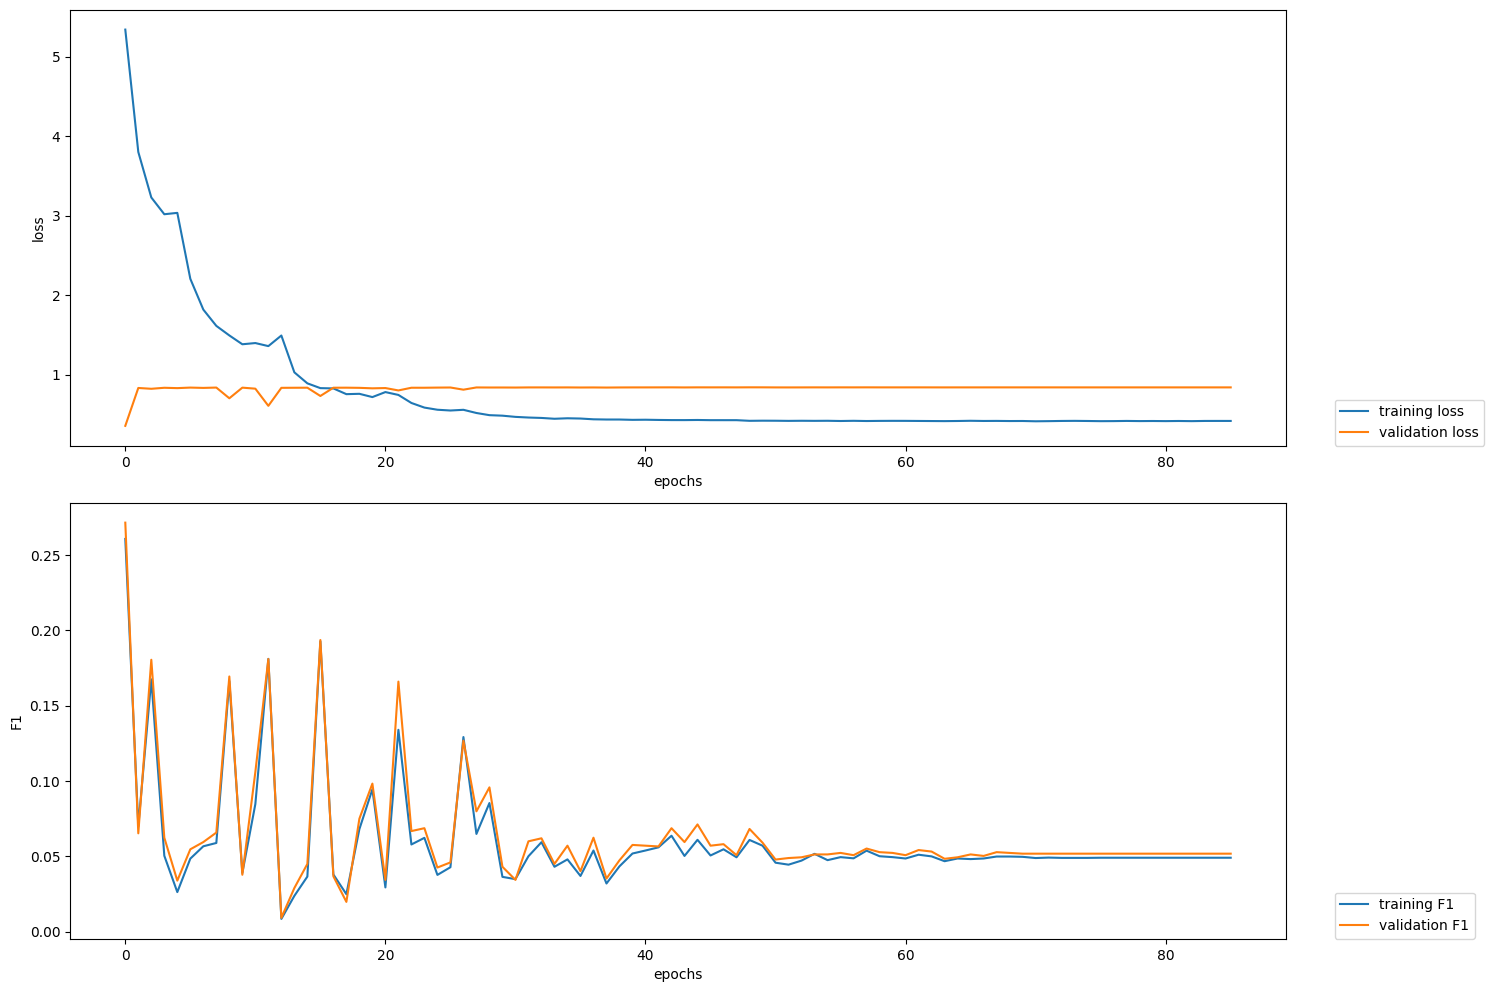

100%|██████████| 79/79 [00:21<00:00,  3.61it/s]

2023-04-21 06:27:32,219 Evaluating as a multi-label problem: True



100%|██████████| 10/10 [00:02<00:00,  3.80it/s]

2023-04-21 06:27:37,604 Evaluating as a multi-label problem: False



100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

2023-04-21 06:27:43,066 Evaluating as a multi-label problem: True


,split,index,I-ADR,E-ADR,B-ADR,S-ADR,S-Drug,B-Finding,E-Finding,I-Finding,...,B-Symptom,B-Drug,S-Finding,I-Symptom,I-Drug,I-Disease,micro avg,macro avg,weighted avg,samples avg
0,train,precision,0.517007,0.694561,0.767782,0.783784,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.705263,0.138157,0.532686,0.008484
1,train,recall,0.017082,0.094695,0.109585,0.021277,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.051139,0.012132,0.051139,0.008484
2,train,f1-score,0.033072,0.166667,0.191795,0.041429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.095362,0.021648,0.090972,0.008484
3,train,support,4449.000000,3506.000000,3349.000000,1363.000000,1286.0,200.0,200.0,149.0,...,110.0,110.0,109.0,104.0,50.0,50.0,15722.000000,15722.000000,15722.000000,15722.000000
4,dev,precision,0.307692,0.689189,0.743243,0.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.682927,0.120340,0.453228,NaN
5,dev,recall,0.007737,0.113586,0.124434,0.009569,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.054211,0.012766,0.054211,NaN
6,dev,f1-score,0.015094,0.195029,0.213178,0.018868,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.100448,0.022108,0.093679,NaN
7,dev,support,517.000000,449.000000,442.000000,209.000000,164.0,39.0,34.0,20.0,...,12.0,20.0,25.0,23.0,7.0,13.0,2066.000000,2066.000000,2066.000000,NaN
8,test,precision,0.538462,0.720000,0.820000,0.800000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.745763,0.143923,0.538005,0.007436
9,test,recall,0.013333,0.081448,0.098086,0.025316,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.044243,0.010909,0.044243,0.007436


In [17]:
print(suf)

os.mkdir('flair_ner_model'+suf+'/classification_report')
plotter.plot_training_curves('flair_ner_model'+suf+'/loss.tsv')

# evaluate the tagger on the test set
result = tagger.evaluate(corpus.train, 
                         embeddings_storage_mode='gpu',
                         mini_batch_size=12,
                         main_evaluation_metric = ("weighted avg", "f1-score"),
                         gold_label_type='ner',
                         gold_label_dictionary=tag_dictionary)
open('flair_ner_model'+suf+'/classification_report/train.txt', 'w').write(str(result))
res1 = pd.DataFrame.from_dict(result.classification_report).reset_index()
res1.insert(loc=0, column='split', value='train')

result = tagger.evaluate(corpus.dev, 
                         embeddings_storage_mode='gpu',
                         mini_batch_size=12,
                         main_evaluation_metric = ("weighted avg", "f1-score"),
                         gold_label_type='ner',
                         gold_label_dictionary=tag_dictionary)
open('flair_ner_model'+suf+'/classification_report/dev.txt', 'w').write(str(result))
res2 = pd.DataFrame.from_dict(result.classification_report).reset_index()
res2.insert(loc=0, column='split', value='dev')

result = tagger.evaluate(corpus.test, 
                         embeddings_storage_mode='gpu',
                         mini_batch_size=12,
                         main_evaluation_metric = ("weighted avg", "f1-score"),
                         gold_label_type='ner',
                         gold_label_dictionary=tag_dictionary)
open('flair_ner_model'+suf+'/classification_report/test.txt', 'w').write(str(result))
res3 = pd.DataFrame.from_dict(result.classification_report).reset_index()
res3.insert(loc=0, column='split', value='test')

res = pd.concat([res1,res2,res3],ignore_index=True)
res.to_csv('flair_ner_model'+suf+'/classification_report.csv',index=False)
res

In [18]:
# import time
# start_time = time.time()
# while time.time() - start_time < 1:
#     time.sleep(1)
# print('Session has timed out (2 minutes). Disconnecting...')
# !kill -9 -1

Layering can be a good idea if the NER tags in the first layer have their own set of dependent values in the second layer. This can help capture more information about the entities being recognized and provide more context for downstream tasks. However, it also increases the complexity of the annotation and the training process, so it should be used judiciously. In general, it's a good idea to start with a simple tag scheme and gradually increase complexity as needed.

    does it really matter if u use the E header

It depends on the specific task and the requirements of the downstream model. In some cases, using the E tag can help disambiguate between overlapping entities, while in other cases it may not be necessary or even desired. Ultimately, it's up to the developer to determine the appropriate tagging scheme for their specific use case.

    would adding POS as an extra NER layer help model performance or not

Adding POS as an extra NER layer may or may not help model performance, depending on the specific use case and data being analyzed.

On one hand, incorporating POS tags could provide additional context to the model and help it better distinguish between named entities and other parts of speech. For example, knowing that a word is a noun or verb could help the model determine if it is likely to be a named entity or not.

On the other hand, adding an additional layer could also increase model complexity and training time without necessarily improving performance. It may also require additional manual annotation efforts to create a labeled dataset with both NER and POS tags.

Ultimately, whether to include POS as an additional layer will depend on the specific requirements and goals of the project, as well as the available data and resources.

    besides bioes ordering (which is up-to-down), it doesn't matter what order the tags in the same domain appear in left-to-right?

Yes, that is correct. As long as the BIOES order is maintained vertically, the order of tags in the same domain from left-to-right should not impact training in flai

    different typenames must be treated as separate tasks?

Yes, that's correct. Different typenames should be treated as separate tasks because they represent different types of annotations that you want to predict. For example, in a biomedical NER task, you might want to predict the entity types of both drugs and diseases, which would be represented by two different typenames in your annotation data. Predicting both types of entities would require different models and possibly different evaluation metrics.